<a href="https://colab.research.google.com/github/avivbach/ML_FirstAssignment/blob/main/FirstAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Prediction - Advanced Regression Techniques

Names:
IDs:
Kaggle Profiles:

## Overview

In this notebook, we aim to predict house prices in Ames, Iowa, using the "House Prices - Advanced Regression Techniques" dataset provided by Kaggle. Our primary goal is to build a reliable and accurate predictive model utilizing Linear Regression techniques. To achieve this, we will:

Conduct comprehensive exploratory data analysis (EDA) to understand the dataset and its features.

Perform data preprocessing, including handling missing values, encoding categorical variables, and creating new meaningful features.

Implement and tune a Linear Regression model, testing various hyperparameters and regularization techniques to enhance performance.

Evaluate the model rigorously using validation techniques and error metrics such as Root Mean Squared Error (RMSE).

Submit predictions to Kaggle's competition to benchmark performance.

Throughout this notebook, visualizations and detailed explanations will be provided to clearly communicate our methodology, findings, and insights gained from the analysis. Our final goal is not only achieving a strong predictive performance but also ensuring clarity and reproducibility of the entire analytical process.

## Imports and Definitions


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets
from sklearn import pipeline, preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import random

import pandas as pd
import seaborn as sns # we will use it for showing the regression line



# Show all rows
pd.set_option('display.max_rows', None)
# Show all columns
pd.set_option('display.max_columns', None)
# Optional: prevent column width truncation
pd.set_option('display.max_colwidth', None)
# Optional: prevent wrapping across multiple lines
pd.set_option('display.expand_frame_repr', False)



# define plt settings (you don't have to do it every time, you can you the default values)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)


# Define my custom color palette
my_palette = [
 # Blues
    (0.5, 0.7, 0.9),  # Pastel blue
    (0.6, 0.8, 0.9),  # Light pastel blue
    (0.4, 0.6, 0.8),  # Deep pastel blue
    (0.7, 0.85, 0.95),  # Sky pastel blue
    (0.3, 0.5, 0.7),   # Cool pastel blue
    (0.55, 0.75, 0.85),  # Cloudy pastel blue
    (0.45, 0.65, 0.85),  # Ocean pastel blue
    (0.38, 0.58, 0.78),  # Subtle pastel blue
    (0.48, 0.68, 0.88),  # Misty pastel blue
    (0.6, 0.78, 0.92),  # Calm pastel blue
    (0.5, 0.73, 0.85) , # Soft sky pastel blue


#Purples =
    (0.8, 0.6, 0.9),  # Pastel purple
    (0.7, 0.5, 0.8),  # Light pastel purple
    (0.9, 0.7, 1.0),  # Soft lavender
    (0.85, 0.65, 0.95),  # Subtle pastel purple
    (0.75, 0.55, 0.85),  # Dreamy pastel purple
    (0.92, 0.72, 0.98),  # Lilac pastel purple
    (0.78, 0.58, 0.88),  # Light orchid purple
    (0.82, 0.62, 0.92),  # Lavender blush pastel purple
    (0.88, 0.68, 0.96),  # Light violet pastel purple
    (0.83, 0.63, 0.9),  # Soft amethyst pastel purple
    (0.9, 0.75, 0.97),   # Blooming pastel purple

#Pinks
    (224/255, 31/255, 137/255),  # Vibrant pink
    (231/255, 72/255, 161/255),  # Medium pink
    (243/255, 165/255, 208/255),  # Light pink
    (1.0, 0.8, 0.9),  # Cotton candy pink
    (0.95, 0.7, 0.85),  # Blush pink
    (0.98, 0.75, 0.88),  # Rose quartz pastel pink
    (0.96, 0.68, 0.8),  # Soft coral pastel pink
    (0.94, 0.6, 0.75),  # Pastel bubblegum pink
    (0.97, 0.77, 0.87),  # Sakura pastel pink
    (0.92, 0.65, 0.8),  # Light raspberry pastel pink
    (0.89, 0.58, 0.72)   # Dusky pastel pink
]


## Competition Description

This section provides a brief explanation of the competition. We describe the objective of the task, which is to predict final house sale prices using a variety of explanatory variables. Understanding the competition's goal, evaluation metric (RMSE), and data format will help guide our data preparation and modeling strategy.


In [ ]:
#Competition link
competition_url = "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques"
print(f"Kaggle Competition: {competition_url}")


Kaggle Competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques


## Data Exploration (EDA)

Here, we perform an in-depth exploratory data analysis to uncover patterns, spot anomalies, and understand the structure of the data. This section helps us decide how to clean and transform the data later.

### Steps:

* Load and inspect the data: Understand the size and types of variables.
* Check for missing values: Identify which features have missing data that will need to be handled later.
* Understand the target variable: Look at the distribution of SalePrice.
* Explore correlations: Understand which variables are most strongly related to the target.
* Visualize features: Use plots to spot trends, outliers, and relationships.

#### Load the data

In [ ]:
# Load the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.drop(columns=["Id"], inplace=True), train.reset_index(drop=True)
test.drop(columns=["Id"], inplace=True), test.reset_index(drop=True)
# Display the first few rows of the training data
display(train.head())
# Display the first few rows of the test data
display(test.head())





MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd     

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition
0          20       RH         80.0    11622   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd        NaN         0.0        TA        TA     CBlock       TA       TA           No          Rec       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y      SBrkr       896         0             0        896           0.0           0.0         1         0             2             1          TA             5        Typ           0         NaN     Attchd       1961.0          Unf         1.0       730.0         TA         TA          Y         140            0              0          0          120         0    NaN  MnPrv         NaN        0       6    2010       WD        Normal
1          20       RL         81.0    14267   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA       TA           No          ALQ       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y      SBrkr      1329         0             0       1329           0.0           0.0         1         1             3             1          Gd             6        Typ           0         NaN     Attchd       1958.0          Unf         1.0       312.0         TA         TA          Y         393           36              0          0            0         0    NaN    NaN        Gar2    12500       6    2010       WD        Normal
2          60       RL         74.0    13830   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd        NaN         0.0        TA        TA      PConc       Gd       TA           No          GLQ       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y      SBrkr       928       701             0       1629           0.0           0.0         2         1             3             1          TA             6        Typ           1          TA     Attchd       1997.0          Fin         2.0       482.0         TA         TA          Y         212           34              0          0            0         0    NaN  MnPrv         NaN        0       3    2010       WD        Normal
3          60       RL         78.0     9978   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace        20.0        TA        TA      PConc       TA       TA           No          GLQ       602.0          Unf         0.0      324.0        926.0    GasA        Ex          Y      SBrkr       926       678   

### Display the dataset info, count, Nan, columns type, etc.

#### DataSet Shape

In [ ]:
print(f"Train shape: {train.shape}\nTest shape: {test.shape}")
print(f"Train columns: {train.columns}\nTest columns: {test.columns}")

Train shape: (1460, 80)
Test shape: (1459, 79)
Train columns: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'Gar

#### dtypes
Since up to this point in the course, we have only learned how to work with numerical values,
in the first step, we will examine the data types (`dtypes`) and remove all non-numeric columns from the dataset.


In [ ]:
# Display the data types of the data - print as dictionary (easier to read since there are a lot of columns)
print(f"Data types in training data:\n{train.dtypes.to_dict()}")
print(f"Data types in test data:\n{test.dtypes.to_dict()}")

#Remove all non-numeric columns
train_numeric = train.select_dtypes(include=[np.number])
test_numeric = test.select_dtypes(include=[np.number])

# Display the data types of the cleaned data
print(f"\n\nData types in train_numeric data:\n{train_numeric.dtypes}")
print(f"\n\nData types in test_numeric data:\n{test_numeric.dtypes}")


Data types in training data:
{'MSSubClass': dtype('int64'), 'MSZoning': dtype('O'), 'LotFrontage': dtype('float64'), 'LotArea': dtype('int64'), 'Street': dtype('O'), 'Alley': dtype('O'), 'LotShape': dtype('O'), 'LandContour': dtype('O'), 'Utilities': dtype('O'), 'LotConfig': dtype('O'), 'LandSlope': dtype('O'), 'Neighborhood': dtype('O'), 'Condition1': dtype('O'), 'Condition2': dtype('O'), 'BldgType': dtype('O'), 'HouseStyle': dtype('O'), 'OverallQual': dtype('int64'), 'OverallCond': dtype('int64'), 'YearBuilt': dtype('int64'), 'YearRemodAdd': dtype('int64'), 'RoofStyle': dtype('O'), 'RoofMatl': dtype('O'), 'Exterior1st': dtype('O'), 'Exterior2nd': dtype('O'), 'MasVnrType': dtype('O'), 'MasVnrArea': dtype('float64'), 'ExterQual': dtype('O'), 'ExterCond': dtype('O'), 'Foundation': dtype('O'), 'BsmtQual': dtype('O'), 'BsmtCond': dtype('O'), 'BsmtExposure': dtype('O'), 'BsmtFinType1': dtype('O'), 'BsmtFinSF1': dtype('int64'), 'BsmtFinType2': dtype('O'), 'BsmtFinSF2': dtype('int64'), 'Bsmt

#### info
ֿNow that we’ve kept only the numeric columns, we will look for missing values and address them appropriately.

We use the `.info()` function to get a quick overview of the dataset, including the number of entries, column names, data types, and most importantly — how many non-null values exist in each column.  
This helps us identify which columns contain missing values (NaNs) that will need to be handled later.



In [ ]:
test_numeric.info()
print("\n\n")
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1232 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

#### Visualize columns with missing values
This is another method to examine columns with missing values — using a more visual approach.  
It provides a combined table showing:
- The number of missing values per feature
- The percentage they represent out of the total dataset
- A barplot that highlights the columns that require attention

This visualization makes it easier to identify problematic features and decide on appropriate handling strategies.


       Feature  Missing Count          %
0  LotFrontage            259  17.739726
1   MasVnrArea              8   0.547945
2  GarageYrBlt             81   5.547945
         Feature  Missing Count          %
0    LotFrontage            227  15.558602
1     MasVnrArea             15   1.028101
2     BsmtFinSF1              1   0.068540
3     BsmtFinSF2              1   0.068540
4      BsmtUnfSF              1   0.068540
5    TotalBsmtSF              1   0.068540
6   BsmtFullBath              2   0.137080
7   BsmtHalfBath              2   0.137080
8    GarageYrBlt             78   5.346127
9     GarageCars              1   0.068540
10    GarageArea              1   0.068540


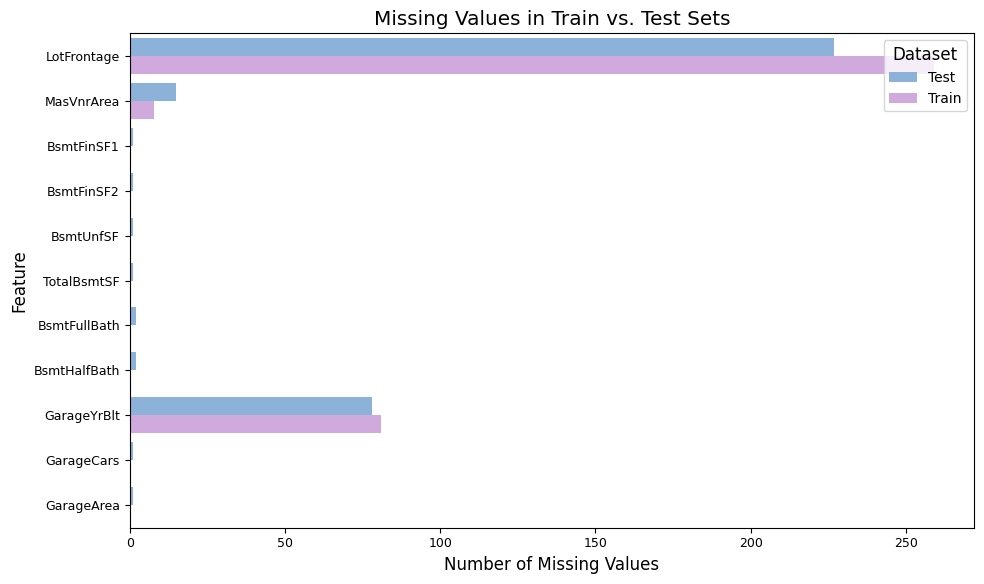

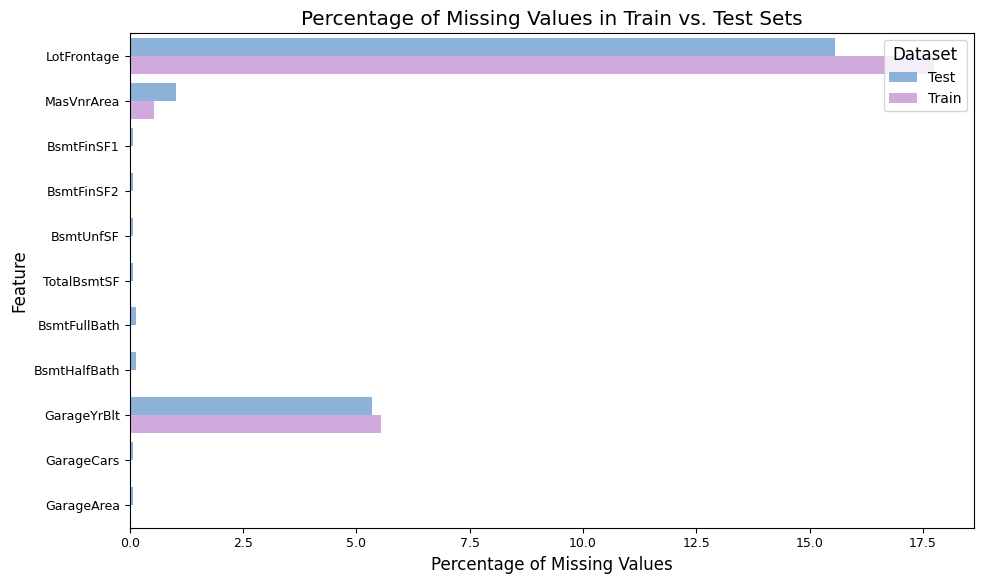

In [ ]:
missing_train = {}
for key,value in train_numeric.isna().sum().to_dict().items(): # Check for missing values in the test set
    if value > 0:
        missing_train[key] = value

# Convert to DataFrame
missing_train = pd.DataFrame(list(missing_train.items()), columns=['Feature', 'Missing Count'])
missing_train['%'] = missing_train['Missing Count'] / len(train_numeric) * 100
print(missing_train)


missing_test = {}
for key,value in test_numeric.isna().sum().to_dict().items(): # Check for missing values in the test set
    if value > 0:
        missing_test[key] = value

# Convert to DataFrame
missing_test = pd.DataFrame(list(missing_test.items()), columns=['Feature', 'Missing Count'])
missing_test['%'] = missing_test['Missing Count'] / len(test_numeric) * 100
print(missing_test)



# Add 'Dataset' label to each
missing_test['Dataset'] = 'Test'
missing_train['Dataset'] = 'Train'

# Combine the two into one dataframe
df_combined = pd.concat([missing_test, missing_train], axis=0)

# Plot grouped barplot by feature
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, y='Feature', x='Missing Count', hue='Dataset', palette=[my_palette[0], my_palette[20]])
plt.legend(fontsize=10, loc='upper right', title='Dataset')
plt.title('Missing Values in Train vs. Test Sets')
plt.xlabel('Number of Missing Values', size=12)
plt.ylabel('Feature', size=12)
plt.xticks(size=9)
plt.yticks(size=9)
plt.tight_layout()
plt.show()



# --- Plot percentage of missing values ---
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, y='Feature', x='%', hue='Dataset', palette=[my_palette[0], my_palette[20]])

plt.legend(fontsize=10, loc='upper right', title='Dataset')
plt.title('Percentage of Missing Values in Train vs. Test Sets')
plt.xlabel('Percentage of Missing Values', size=12)
plt.ylabel('Feature', size=12)
plt.xticks(size=9)
plt.yticks(size=9)
plt.tight_layout()
plt.show()


#### Deciding How to Handle Missing Values

After visualizing the percentage of missing values in both the train and test datasets, we now need to decide how to handle them.

There are generally three main approaches to handling missing values in a dataset:

1. **Row removal**:  
ֿ   Drop only the rows where values are missing.
   This is effective when the number of missing rows is small and won’t significantly affect the dataset.
   Since we didnt learn how to fill null values - we will consider to remove rows as long as it is less than 25% of the data. (Carefully, double checking with column removal)

2. **Column removal**:  
   Drop entire features (columns) that contain too many missing values or are unlikely to be informative.  
   This is a reasonable option when a column is missing a large portion of its data (e.g., over 25-30%).

3. **Imputation (filling in missing values) - We Didnt Learn In Class**:  
   Fill in missing values using strategies such as the column’s mean, median, mode, or using model-based techniques.  
   Although this is often the preferred method in real-world data science workflows, **we have not yet learned how to implement imputation** in this course.
   Therefore, we will not apply this method at this stage.

---

For this reason, in our analysis, we will **only consider row or column removal** as valid techniques.
We will inspect the percentage of missing values in each feature and decide:
- Whether dropping a few rows is safe and preserves most of the data,
- Or whether a full column should be removed due to high sparsity.

This approach helps us maintain a clean and reliable dataset, even with our current limited toolbox.

---
### Learning from Bar Plot


##### Less Than 6% of Missing Values
-  `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `BsmtFullBath`, `BsmtHalfBath`, `GarageYrBlt`, `GarageCars`, `GarageArea`
Since we have not yet learned how to implement imputation we will remove these rows.

##### 17.73% Missing Values
`LotFrontage`
Since both approaches have trade-offs — removing rows may reduce sample size, while removing columns may lose potentially useful features —
we will try **both options**, evaluate the performance of each approach on the model, and **choose the better one based on the results**.

In [ ]:
# List of columns to check for missing values
cols_with_nulls = [
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
    'GarageCars', 'GarageArea'
]

# Remove rows with missing values in any of these columns
train_cleaned = train_numeric.dropna(subset=cols_with_nulls).copy()
test_cleaned = test_numeric.dropna(subset=cols_with_nulls).copy()

# Check how many rows were dropped
print(f"Original train size: {train.shape[0]}")
print(f"Cleaned train size: {train_cleaned.shape[0]}")


# Check how many rows were dropped
print(f"Original train size: {test.shape[0]}")
print(f"Cleaned train size: {test_cleaned.shape[0]}")




Original train size: 1460
Cleaned train size: 1371
Original train size: 1459
Cleaned train size: 1365


#### Try dropping rows with missing values in LotFrontage


In [ ]:
# train_cleaned = train_cleaned.dropna(subset='LotFrontage').copy()

# # Check how many rows were dropped
# print(f"Original train size: {train.shape[0]}")
# print(f"Cleaned train size: {train_cleaned.shape[0]}")
# # Check how many rows were dropped
# print(f"Original test size: {test.shape[0]}")
# print(f"Cleaned test size: {test_cleaned.shape[0]}")

#### Try Model Without LotFrontage


In [ ]:
# Drop the LotFrontage column
train_cleaned = train_cleaned.drop(columns=['LotFrontage'])
test_cleaned = test_cleaned.drop(columns=['LotFrontage'])

### Describe

We use the `.describe()` function to generate summary statistics for each numerical feature.

This includes key measures such as:
- **count**: number of non-null entries  
- **mean** and **std**: average and standard deviation  
- **min**, **25%**, **50% (median)**, **75%**, and **max**: distribution quantiles

We now focus on features that may:
- Identify **potential outliers**, using the **IQR (interquartile range)** method  
- Be **highly spread**, where the difference between the IQR and standard deviation indicates irregularity or skew

This step helps us understand which features are **most relevant and trustworthy** for our model, and whether further preprocessing is required — such as normalization, log transformation, or outlier handling.

---

We also use this step to justify **standardization**.  
Many statistical techniques, including **Pearson correlation**, assume that features follow a roughly **normal distribution** and are on similar scales.
Furthermore, some statistical tests — like t-tests or confidence intervals — rely on the assumption of normality to be valid.

After the table, we will refer to specific columns in the summary table that raise suspicion.

In [ ]:
train_numeric.describe()


MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std      42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000


In [ ]:
test_numeric.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000
mean     57.378341    68.580357   9819.161069     6.078821     5.553804  1971.357779   1983.662783   100.709141   439.203704    52.619342   554.294925  1046.117970  1156.534613   325.967786      3.543523  1486.045922      0.434454      0.065202     1.570939     0.377656      2.854010      1.042495      6.385195     0.58122  1977.721217     1.766118   472.768861    93.174777    48.313914      24.243317     1.794380    17.064428     1.744345     58.167923     6.104181  2007.769705
std      42.746880    22.376841   4955.517327     1.436812     1.113740    30.390071     21.130467   177.625900   455.268042   176.753926   437.260486   442.898624   398.165820   420.610226     44.043251   485.566099      0.530648      0.252468     0.555190     0.503017      0.829788      0.208472      1.508895     0.64742    26.431175     0.775945   217.048611   127.744882    68.883364      67.227765    20.207842    56.609763    30.491646    630.806978     2.722432     1.301740
min      20.000000    21.000000   1470.000000     1.000000     1.000000  1879.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   407.000000     0.000000      0.000000   407.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      3.000000     0.00000  1895.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000
25%      20.000000    58.000000   7391.000000     5.000000     5.000000  1953.000000   1963.000000     0.000000     0.000000     0.000000   219.250000   784.000000   873.500000     0.000000      0.000000  1117.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.00000  1959.000000     1.000000   318.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     4.000000  2007.000000
50%      50.000000    67.000000   9399.000000     6.000000     5.000000  1973.000000   1992.000000     0.000000   350.500000     0.000000   460.000000   988.000000  1079.000000     0.000000      0.000000  1432.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     0.00000  1979.000000     2.000000   480.000000     0.000000    28.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000
75%      70.000000    80.000000  11517.500000     7.000000     6.000000  2001.000000   2004.000000   164.000000   753.500000     0.000000   797.750000  1305.000000  1382.500000   676.000000      0.000000  1721.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.00000  2002.000000     2.000000   576.000000   168.000000    72.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000
max     190.000000   200.000000  56600.000000    10.000000     9.000000  2010.000000   2010.000000  1290.000000  4010.000000  1526.00000

#### Summary of Features with Suspicious Distributions or Low Predictive Potential

Based on the `.describe()` output for multiple numerical features, we identified several columns that raise concerns regarding their statistical distribution and suitability for linear regression modeling. These columns require additional analysis before inclusion or transformation.

---

#### Features with many zeros and extreme outliers:
`MasVnrArea`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`

These features show:
- Median and 75th percentile = 0
- Extremely high max values relative to the mean
- Very high standard deviation

 Interpretation: Strong **right-skewed distributions** with many inactive cases and rare large values.  


---

#### Features with extreme value ranges:

`GrLivArea`, `BsmtFinSF1`, `2ndFlrSF`, `LowQualFinSF`

These columns show:
- Large differences between mean and max
- Standard deviation close to or greater than the mean

 Interpretation: High potential for **influential outliers**  


---

#### Low-variance or discrete features with few possible values:

`BsmtFullBath`, `BsmtHalfBath`, `HalfBath`

These are integer features with:
- Mostly zeros
- Very small max values (e.g., `HalfBath` max = 2)
- Low variance


---

#### Area-based features with skew and long tails:

`OpenPorchSF`, `WoodDeckSF`, `BsmtFinSF2`

These features share:
- Many zeros
- Median = 0, but large standard deviation
- Max values (e.g., `WoodDeckSF` = 1424) significantly higher than 75th percentile

Interpretation: **Heavy-tailed distributions** with potential outlier influence  
➡ We might consider scaling in order to reduce range bias

---

#### Conclusion:

All of these features should undergo further analysis:
- Plotting histograms or boxplots
- Checking correlation with `SalePrice`

Only after this investigation will we decide what is the right thing to do with those features.

#####
 MasVnrArea
 BstmtFinSF2 c
 BstmtFinSF1 c
 2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath

HalfBath c
WoodDeckSF c
OpenPorchSF c

EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal


### Scatterplot & Joinplot For All Suspicios Features
- Non-linear patterns that Pearson correlation wouldn't capture
- Outliers that could violate assumptions of homoscedasticity (constant variance)
- Linearity, which is required by Linear Regression

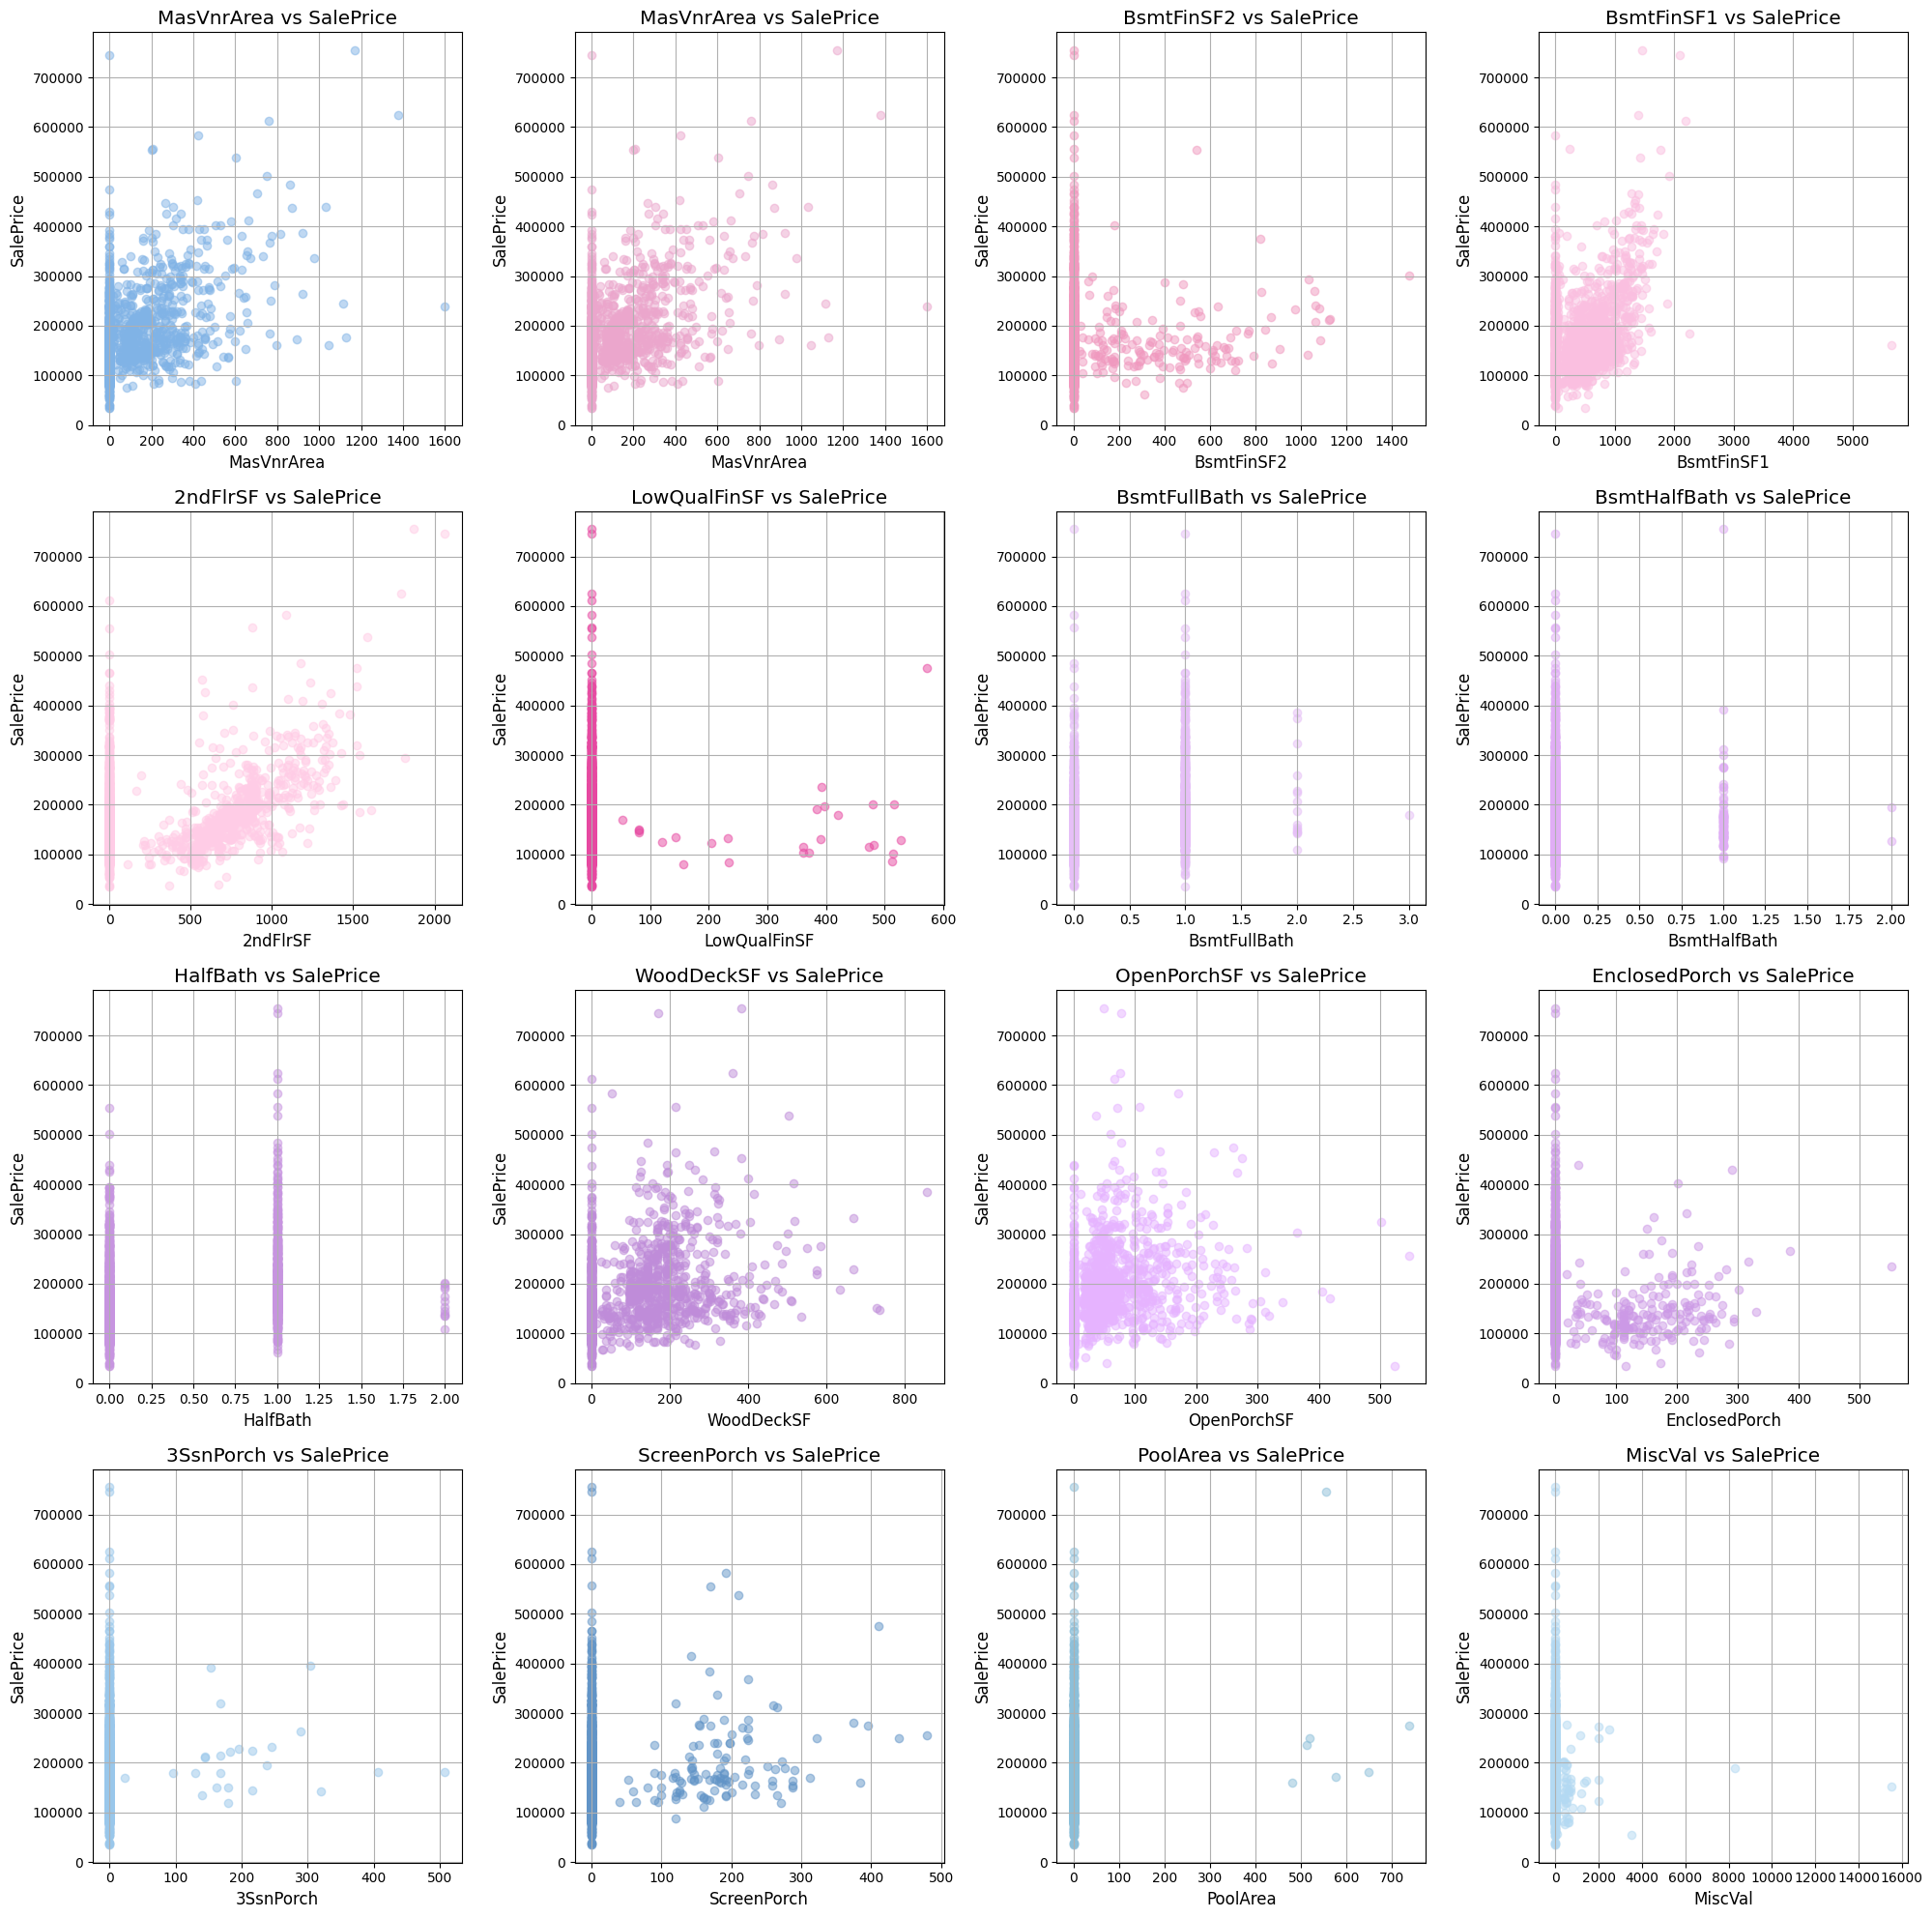

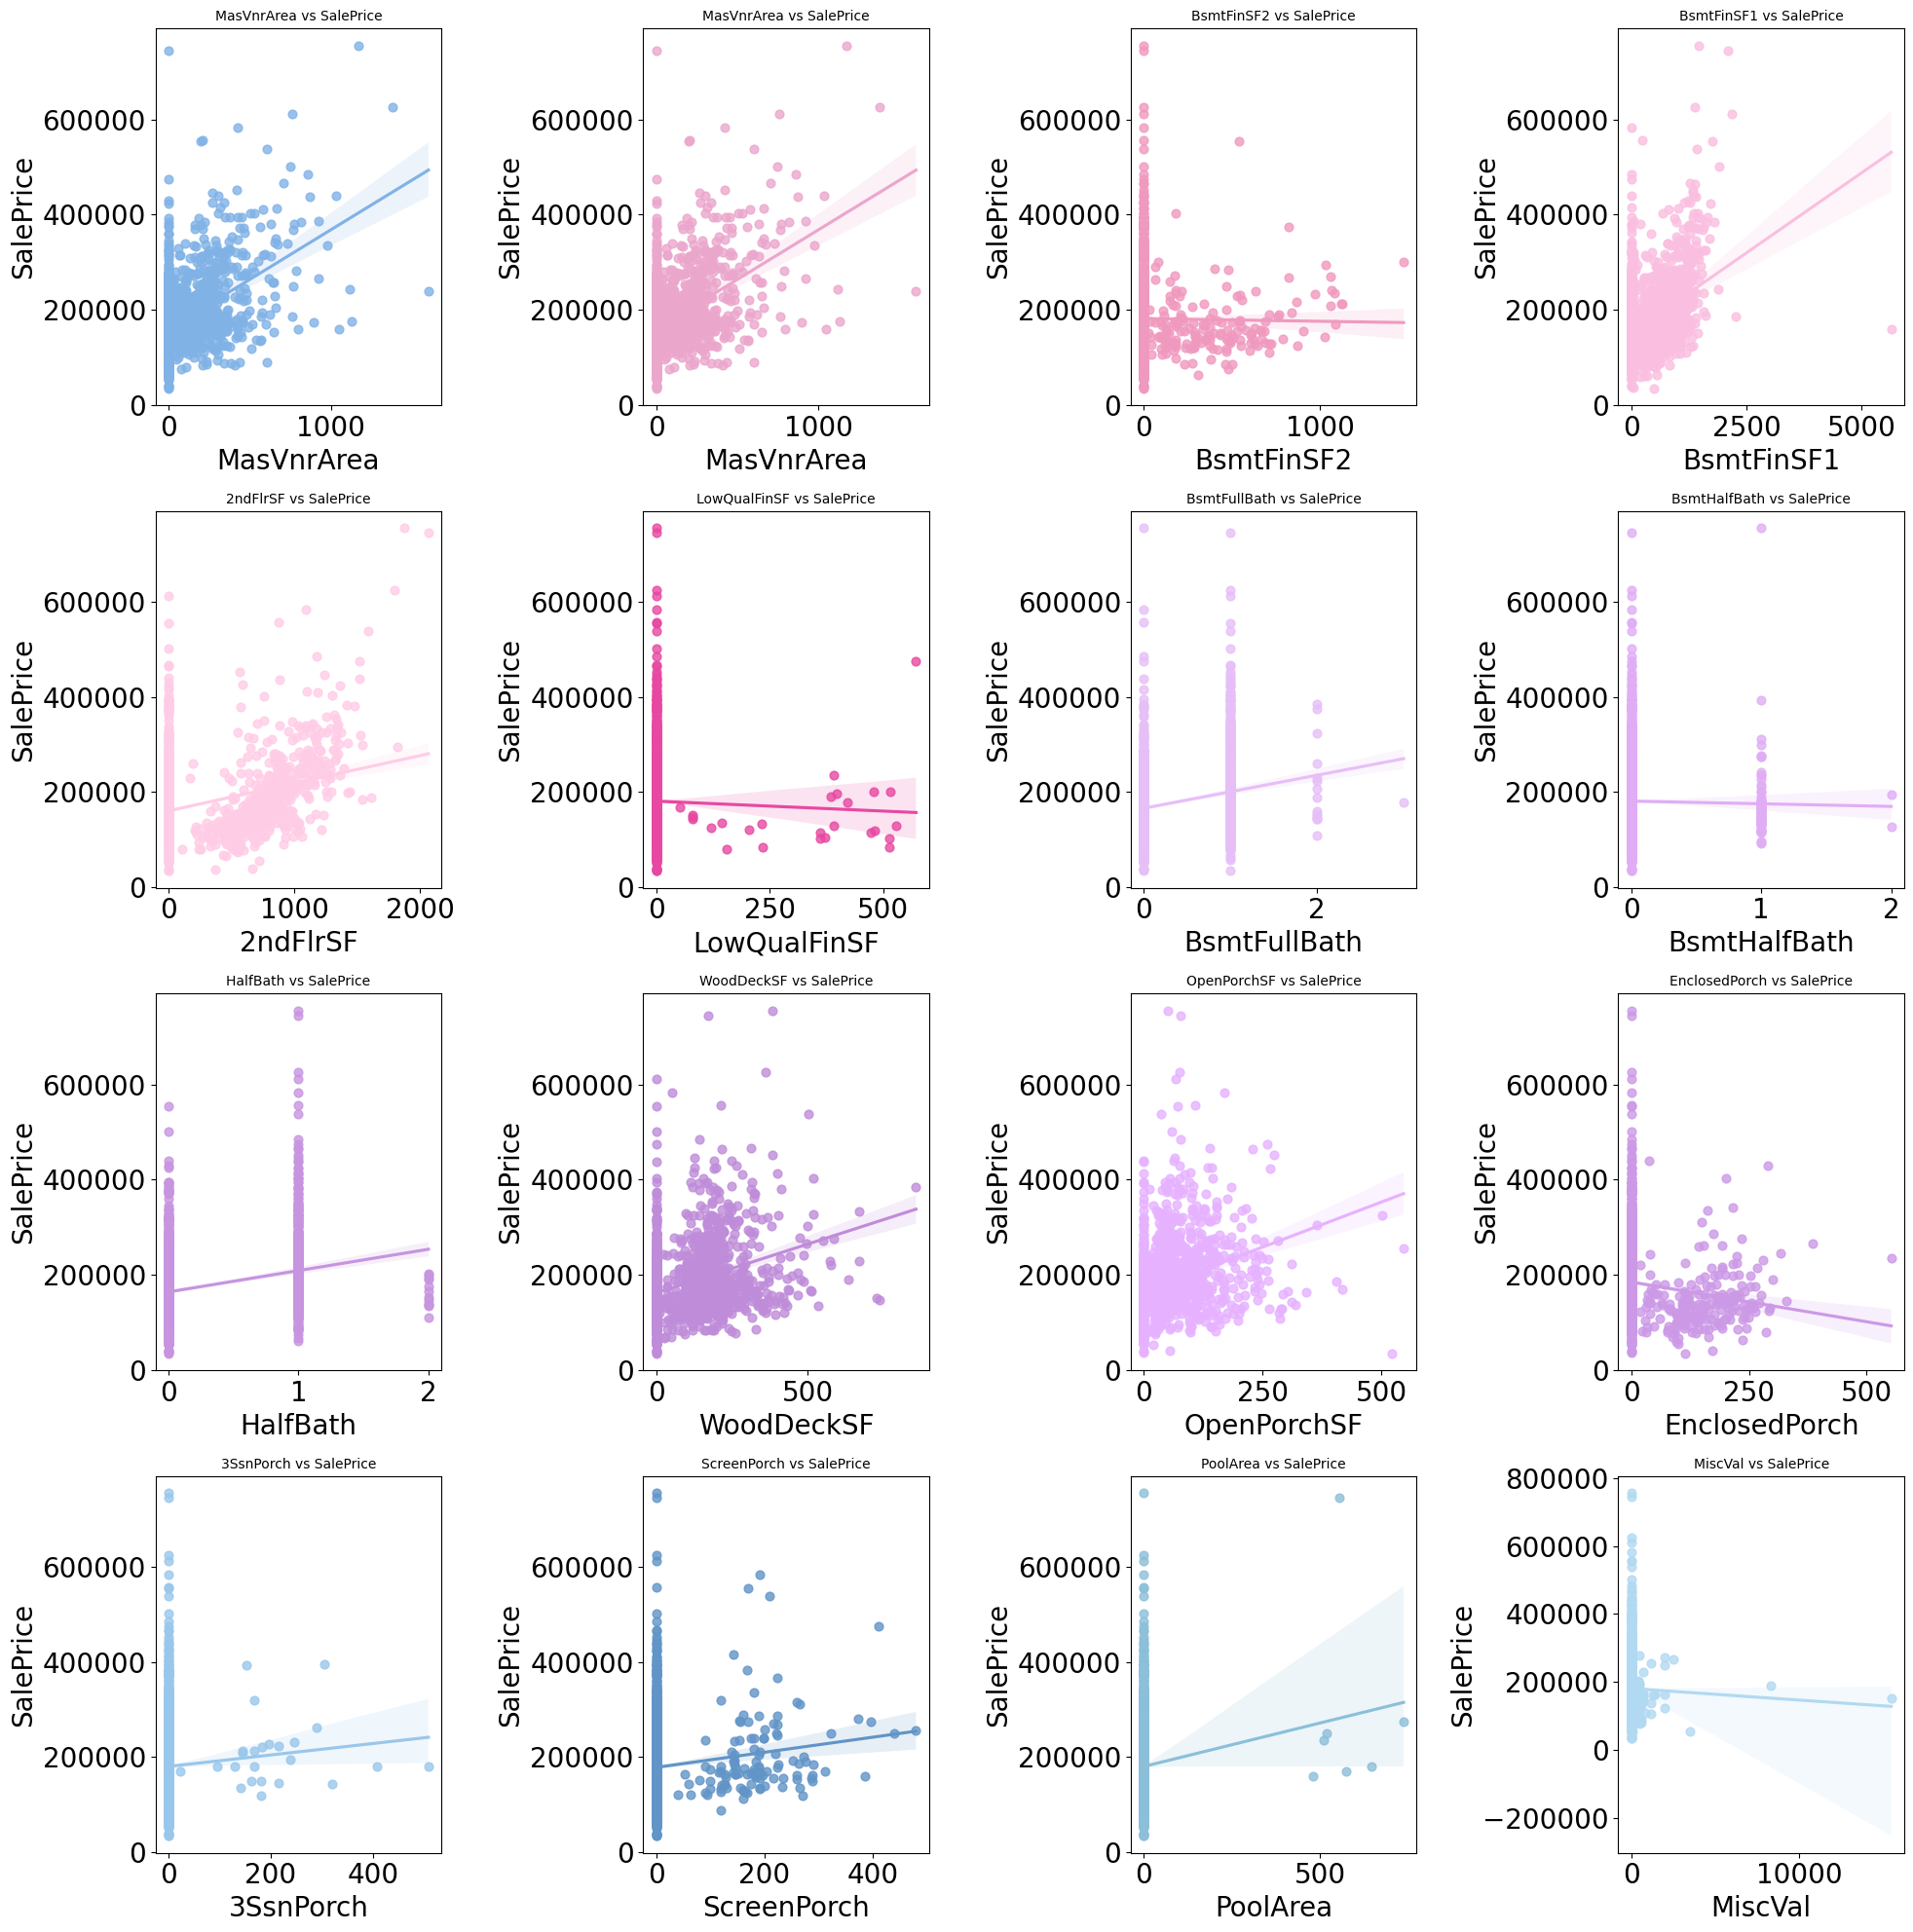

In [ ]:


sus_features = ["MasVnrArea",
            "MasVnrArea",
            "BsmtFinSF2",
            "BsmtFinSF1",
            "2ndFlrSF",
            "LowQualFinSF",
            "BsmtFullBath",
            "BsmtHalfBath",
            "HalfBath",
            "WoodDeckSF",
            "OpenPorchSF",
            "EnclosedPorch",
            "3SsnPorch",
            "ScreenPorch",
            "PoolArea",
            "MiscVal"]

n_features = len(sus_features)

# Define grid size: automatic 2 columns
n_cols = 4
n_rows = (n_features + 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()  # flatten in case of 2D grid

# Loop through features and axes
for i, feature in enumerate(sus_features):
    axes[i].scatter(train_numeric[feature], train_numeric["SalePrice"], alpha=0.5, color=my_palette[-i*2])
    axes[i].set_title(f'{feature} vs SalePrice')
    axes[i].set_xlabel(feature, size=12)
    axes[i].set_ylabel("SalePrice", size=12)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].grid(True)

# Hide any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


def plot_reg_target_values_by_selected_features(df, features, target_column, palette):
    n = len(features)
    nrows = math.ceil(math.sqrt(n))
    ncols = math.ceil(n / nrows)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.regplot(
            x=feature, y=target_column, data=df,
            color=palette[-i*2], ax=axes[i], scatter_kws={"s": 40}
        )
        axes[i].set_title(f'{feature} vs {target_column}', fontsize=10)

    # Remove extra axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# ✅ Usage
plot_reg_target_values_by_selected_features(train_numeric, sus_features, 'SalePrice', my_palette)

#### Feature Selection and Scaling for Linear Regression

After visualizing the scatter plots of numeric features vs. `SalePrice`, we now decide which features to **keep and scale**, and which ones to **drop** due to poor signal or structure.

---

#####  Features to Keep and Scale (Standardization)
`GrLivArea`, `MasVnrArea`, `BsmtFinSF1`, `2ndFlrSF`, `WoodDeckSF`

These features show meaningful **positive correlation** with `SalePrice`, and are continuous with varying ranges.  
To avoid bias in linear regression (which is sensitive to feature magnitude), we will apply **StandardScaler** (Z-score normalization) to these columns:


These features are strong predictors and will be fed directly into the regression model **after scaling**.

---

#### Features with Low Variance or Discrete Steps
`HalfBath`, `BsmtFullBath`, `BsmtHalfBath`

These features have very few unique values, look like they may suit logistic regression:

Since we didnt learn how to use encoding or binarization at this point of the course, and we **cannot create dummy variables**, the scatter plot strengthens the suspicion that these features are not suitable for a linear regression model.

---

#### Features with Too Many Zeros or Weak Signal
`PoolArea`, `MiscVal`, `3SsnPorch`, `EnclosedPorch`, `OpenPorchSF`, `ScreenPorch`, `LowQualFinSF`, `BsmtFinSF2`
These features have:
- Mostly zeros
- Very few non-zero values
- No clear upward trend with `SalePrice`

These features are **sparse** and show little to no predictive power in scatter plots.  
These features may create noise or distortion, but may affect the linear regression so we will
Since we are limited to scaling only (no log-transform or binary conversion), we will **drop these features** from the model to avoid noise or distortion.

---


Linear regression assumes:
- Numeric features with consistent scales
- Linear relationships

By removing sparse or uninformative features and scaling those with strong trends, we make the model more stable and interpretable.


### Bar Plot
In order to decide which features are suitable for a linear regression model, we need to understand how their values are distributed across the dataset.  
To do this effectively, we chose to use **percentage-based histograms**, where the y-axis represents the **percentage of rows** rather than raw counts.

This visualization method provides several key benefits:

- **Relative Frequency View**: It helps us compare how dominant certain values are.
- **Identify Sparse or Zero-Heavy Features**: Columns where 90–100% of the values are zero become immediately visible. Such features are poor candidates for linear models unless transformed properly.
- **Categorical Behavior**: Features that behave like categorical variables (e.g., only values 0, 1, 2) do not fit linear regression model.
- **Outlier Sensitivity**: Skewed features or long-tailed distributions are easier to detect visually than with `.describe()` or statistical summaries alone.
- **Supports Consistent Filtering**: Using these plots, we can consistently justify which features should be:
  - **Kept** and scaled (continuous features with meaningful spread),
  - **Dropped** (features with no variance or not suitable for scaling),
  - Or transformed in future iterations (e.g., via log or binarization).

Overall, this visualization allowed us to make **data-driven, visually-supported decisions** about which features contribute meaningful information to the model and which should be removed to prevent noise or bias.

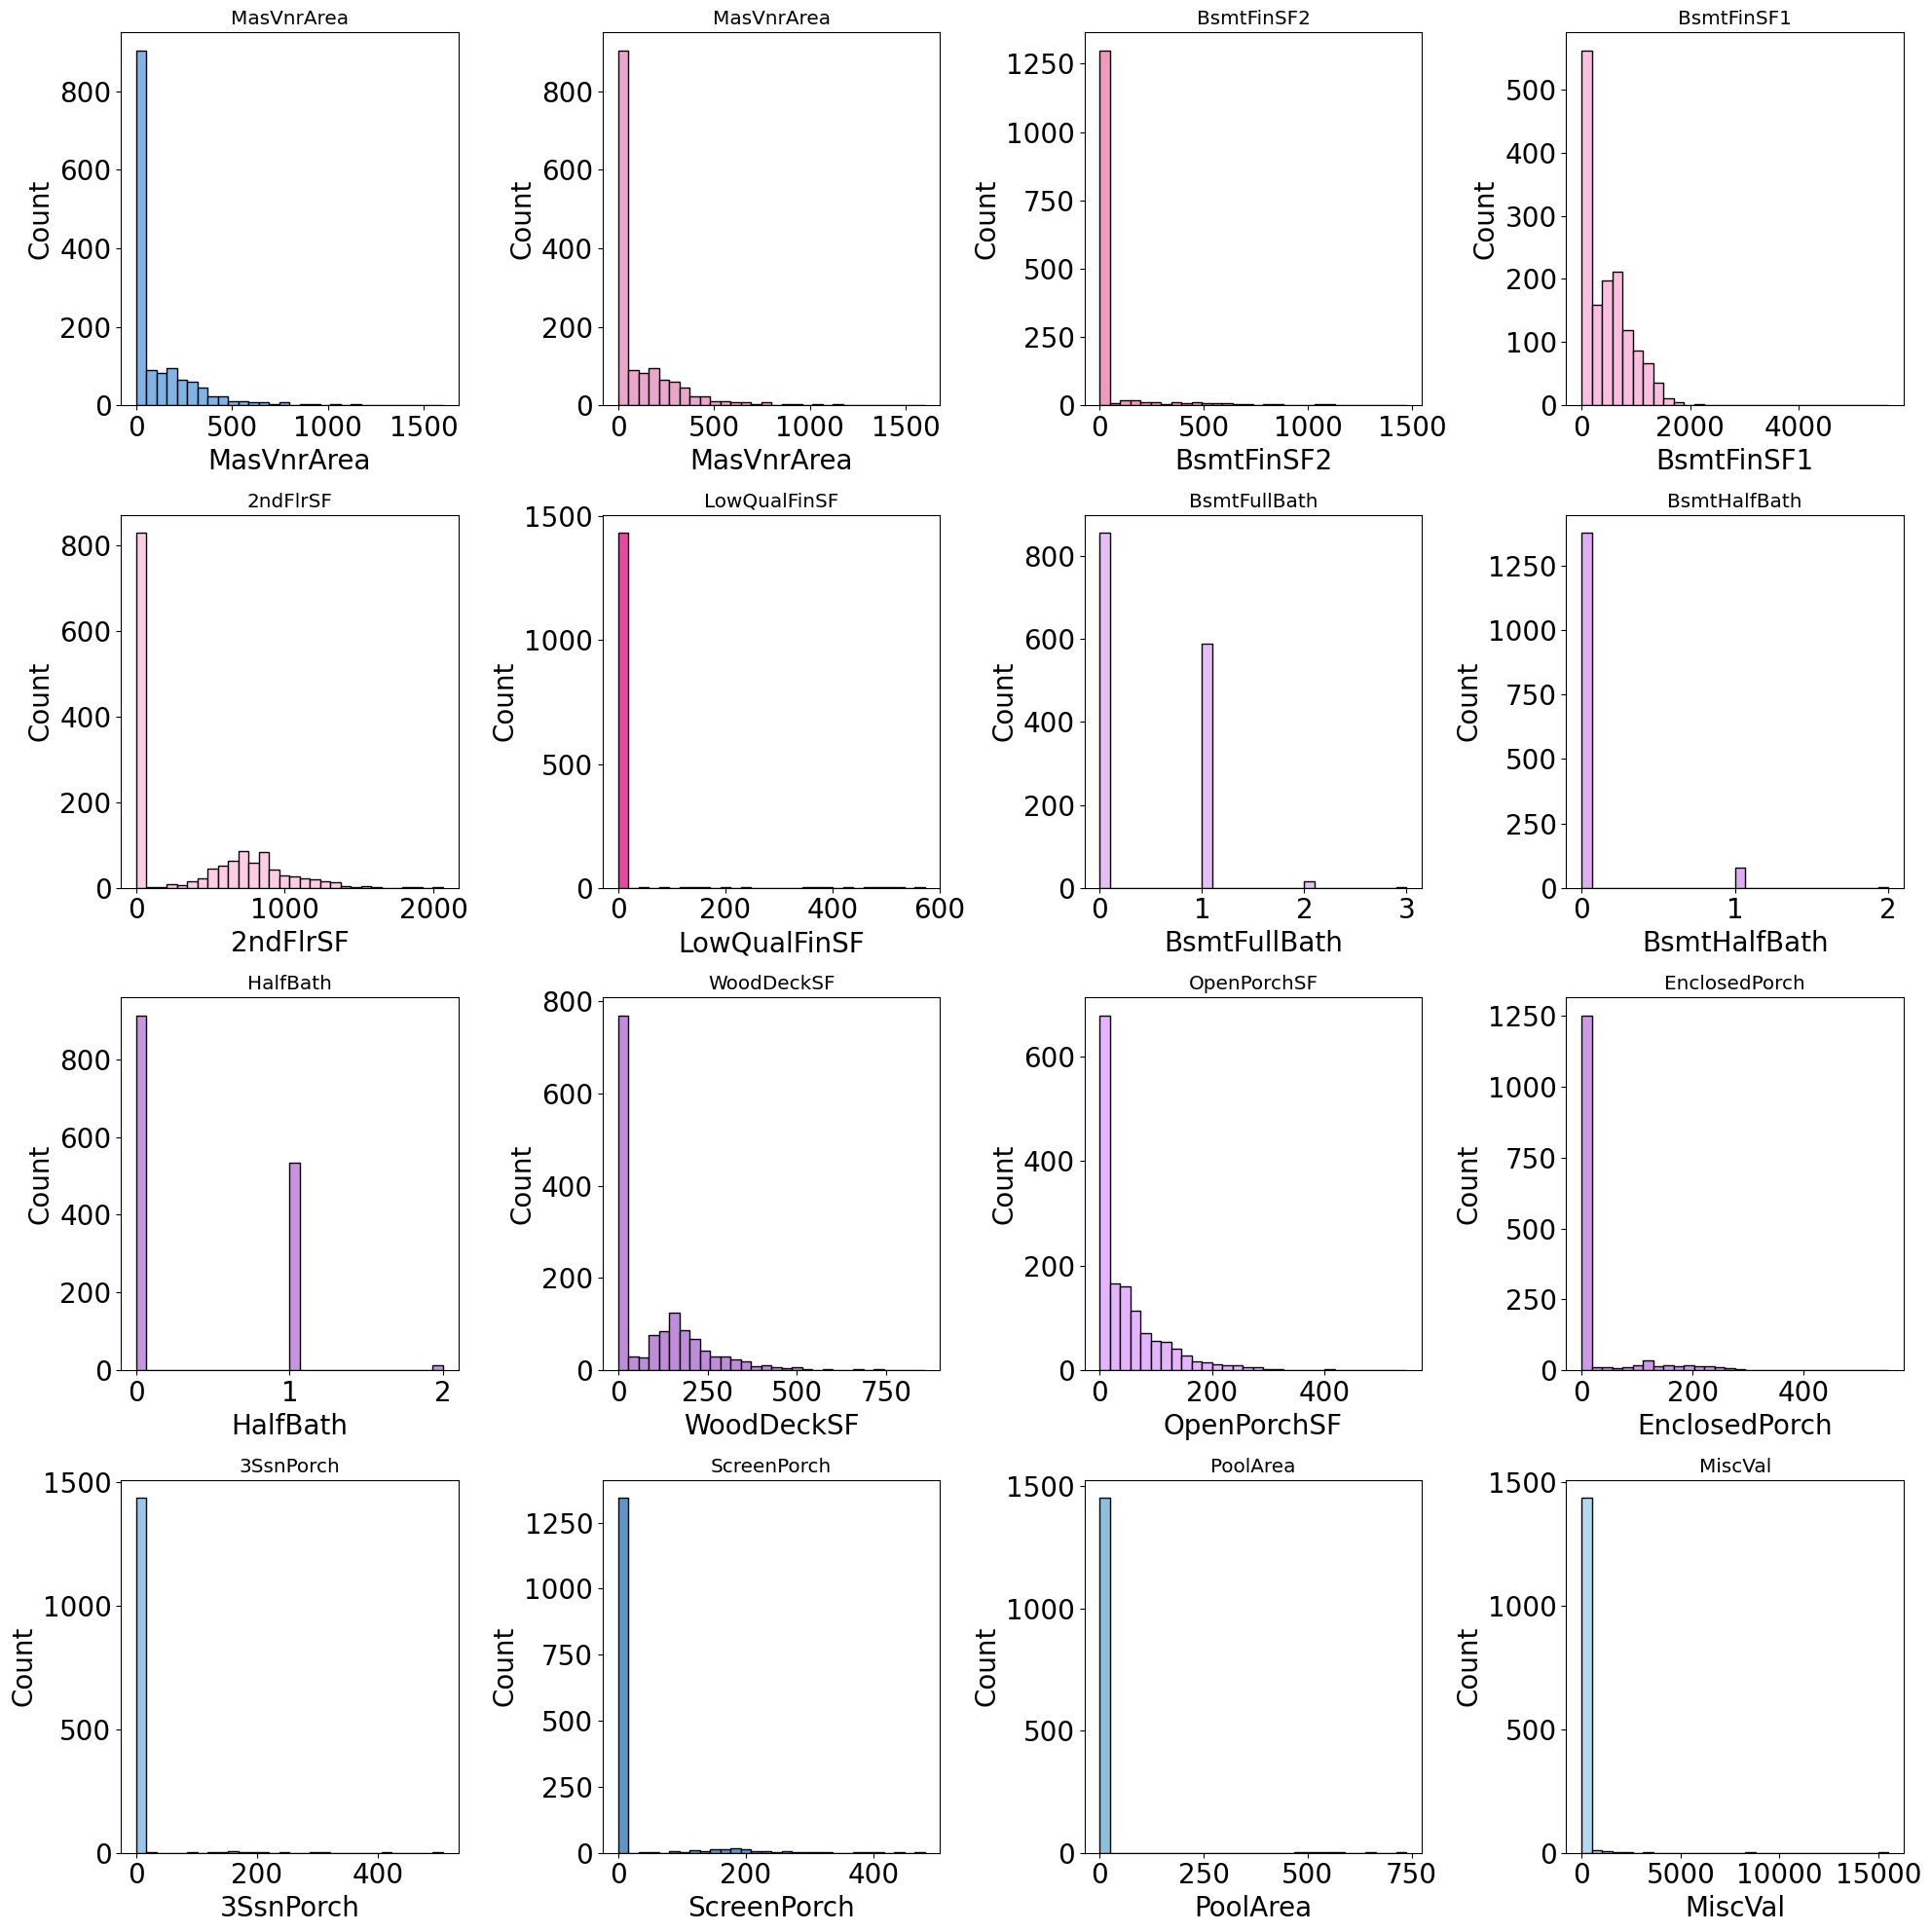

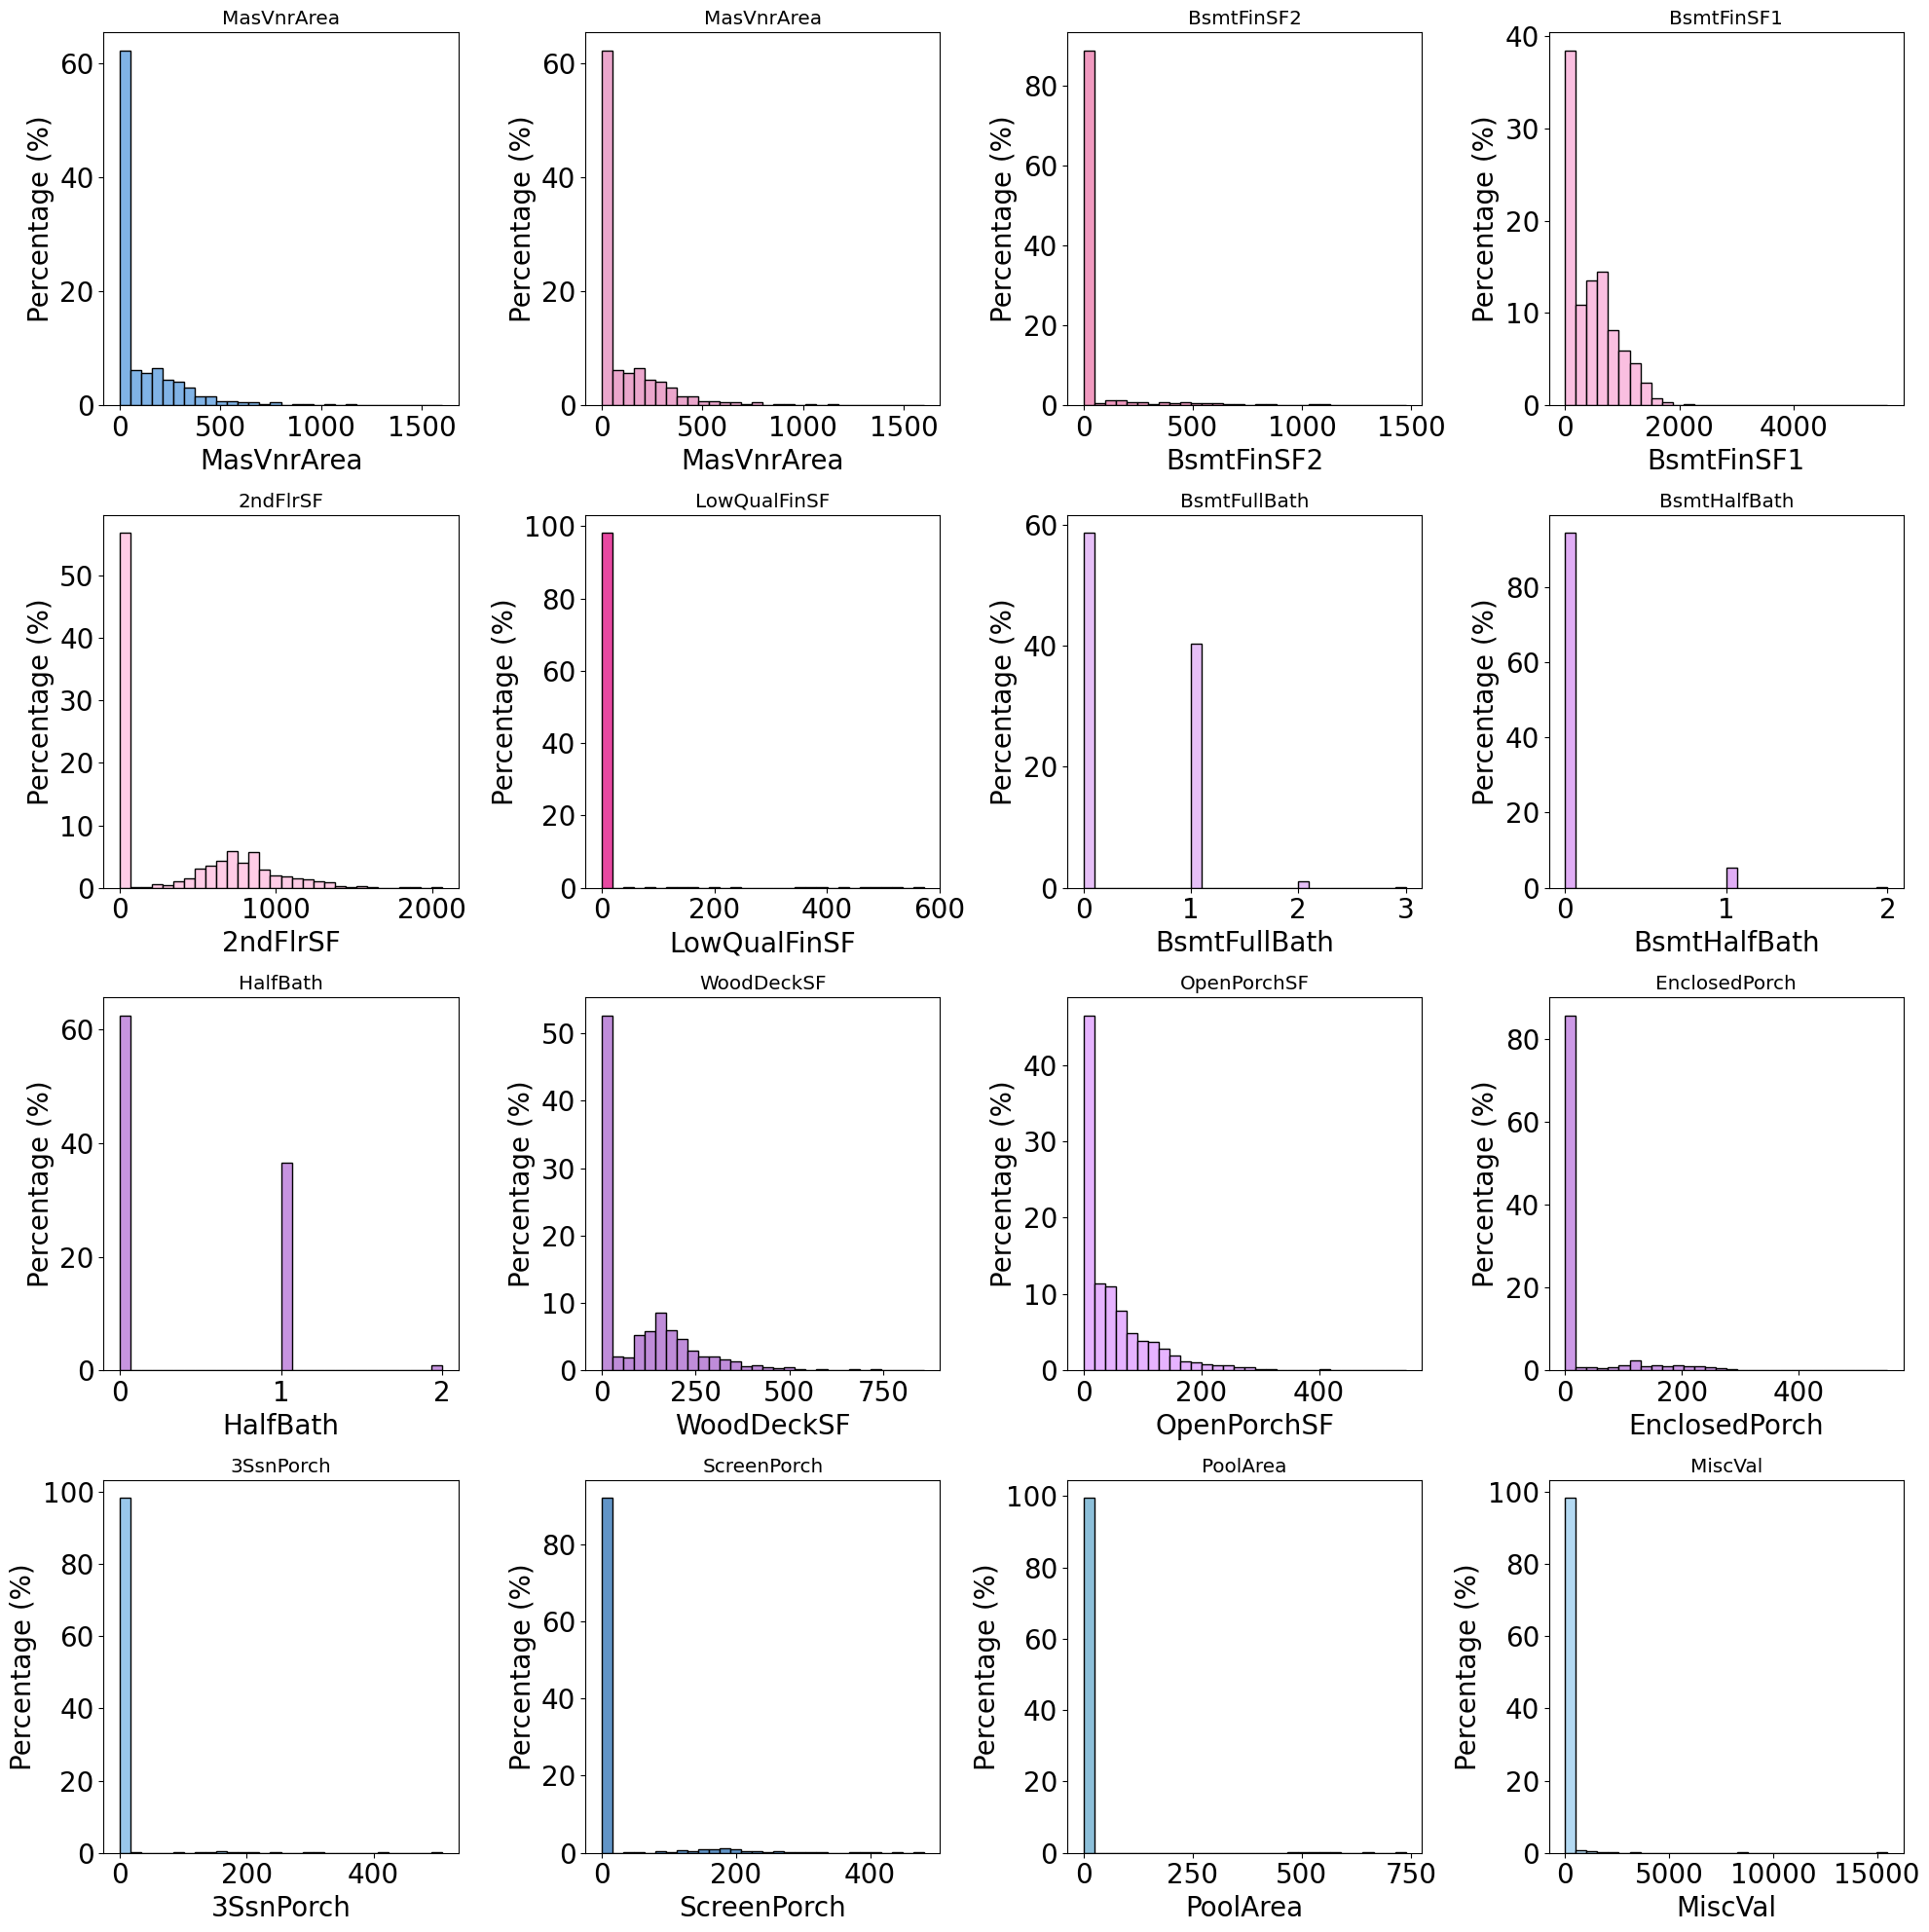

In [ ]:
n_cols = 4
n_rows = (len(sus_features) + n_cols - 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Plot percentage histograms
for i, col in enumerate(sus_features):
    axes[i].hist(train[col].dropna(), bins=30, color=my_palette[-i*2], edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Plot percentage histograms
for i, col in enumerate(sus_features):
    data = train[col].dropna()
    weights = (np.ones_like(data) / len(data)) * 100  # Convert counts to %
    axes[i].hist(data, bins=30, weights=weights, color=my_palette[-i*2], edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Percentage (%)")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Histogram-Based Analysis: Distribution & Suitability for Linear Regression

The percentage histograms show how the values of each numeric feature are distributed across the dataset. These visualizations are critical for identifying:

- **Skewed distributions**
- **Sparse or binary features**
- **Dominant modes or zero-inflated features**
- **Potential transformations or feature removals**

---

##### Features with Continuous, Right-Skewed Distributions (Potentially Useful)

These features have long right tails but contain a meaningful spread of values. They may benefit from **log transformation**, but since we’re only applying scaling, we choose to keep them:

- `MasVnrArea`
- `BsmtFinSF1`
- `2ndFlrSF`
- `WoodDeckSF`
- `OpenPorchSF`

 These features show variability and tend to increase gradually, which suits linear models once scaled. However, outliers may still affect performance.

---

##### Sparse or Near-Zero Features

These features have **very high level of 0**, with a tiny fraction of non-zero values:

- `BsmtFinSF2`, `LowQualFinSF`
- `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`, `EnclosedPorch`

Most of the data points here lie at 0 (~90–100%). Without proper binarization or transformation, these features:
- **Don’t contribute much signal** to a linear model
- Might **bias the coefficients**
- Will not benefit significantly from standard scaling

Consider removing these or replacing with binary flags in future iterations.

---

##### Discrete Low-Cardinality Features

Features like:

- `BsmtFullBath`, `BsmtHalfBath`, `HalfBath`

show **very few unique values** (0, 1, 2), often as vertical lines in scatter plots and sharp spikes in histograms. They are categorical-like but stored as numeric.

In linear regression:
- They’re better used as **categorical features** in logistic regression

Since we only scale features, we **choose to remove them** to avoid misleading coefficients.

---

#### Conclusion

| Feature Type              | Examples                         | Action                       |
|---------------------------|----------------------------------|------------------------------|
| Continuous & right-skewed | `GrLivArea`, `BsmtFinSF1`        | Keep & scale                 |
| Sparse/zero-heavy         | `PoolArea`, `MiscVal`            | Likely drop (weak signal)    |
| Discrete integer (0–2)    | `BsmtHalfBath`, `HalfBath`       | Drop (not suited for scaling)|

This filtering ensures that only features that contribute **meaningful linear variance** remain, which improves the stability and interpretability of the linear regression model.


### Correlation Matrisx
Pearson correlation identifies strong linear relationships between numeric features and the target.
Features with high absolute correlation are potential predictors.
Statistically, high multicollinearity between features or weak correlation with the target
can affect model performance.

Identify features strongly correlated with the target (like SalePrice)
Detect multicollinearity (when two or more features are highly correlated with each other)
Guide feature selection

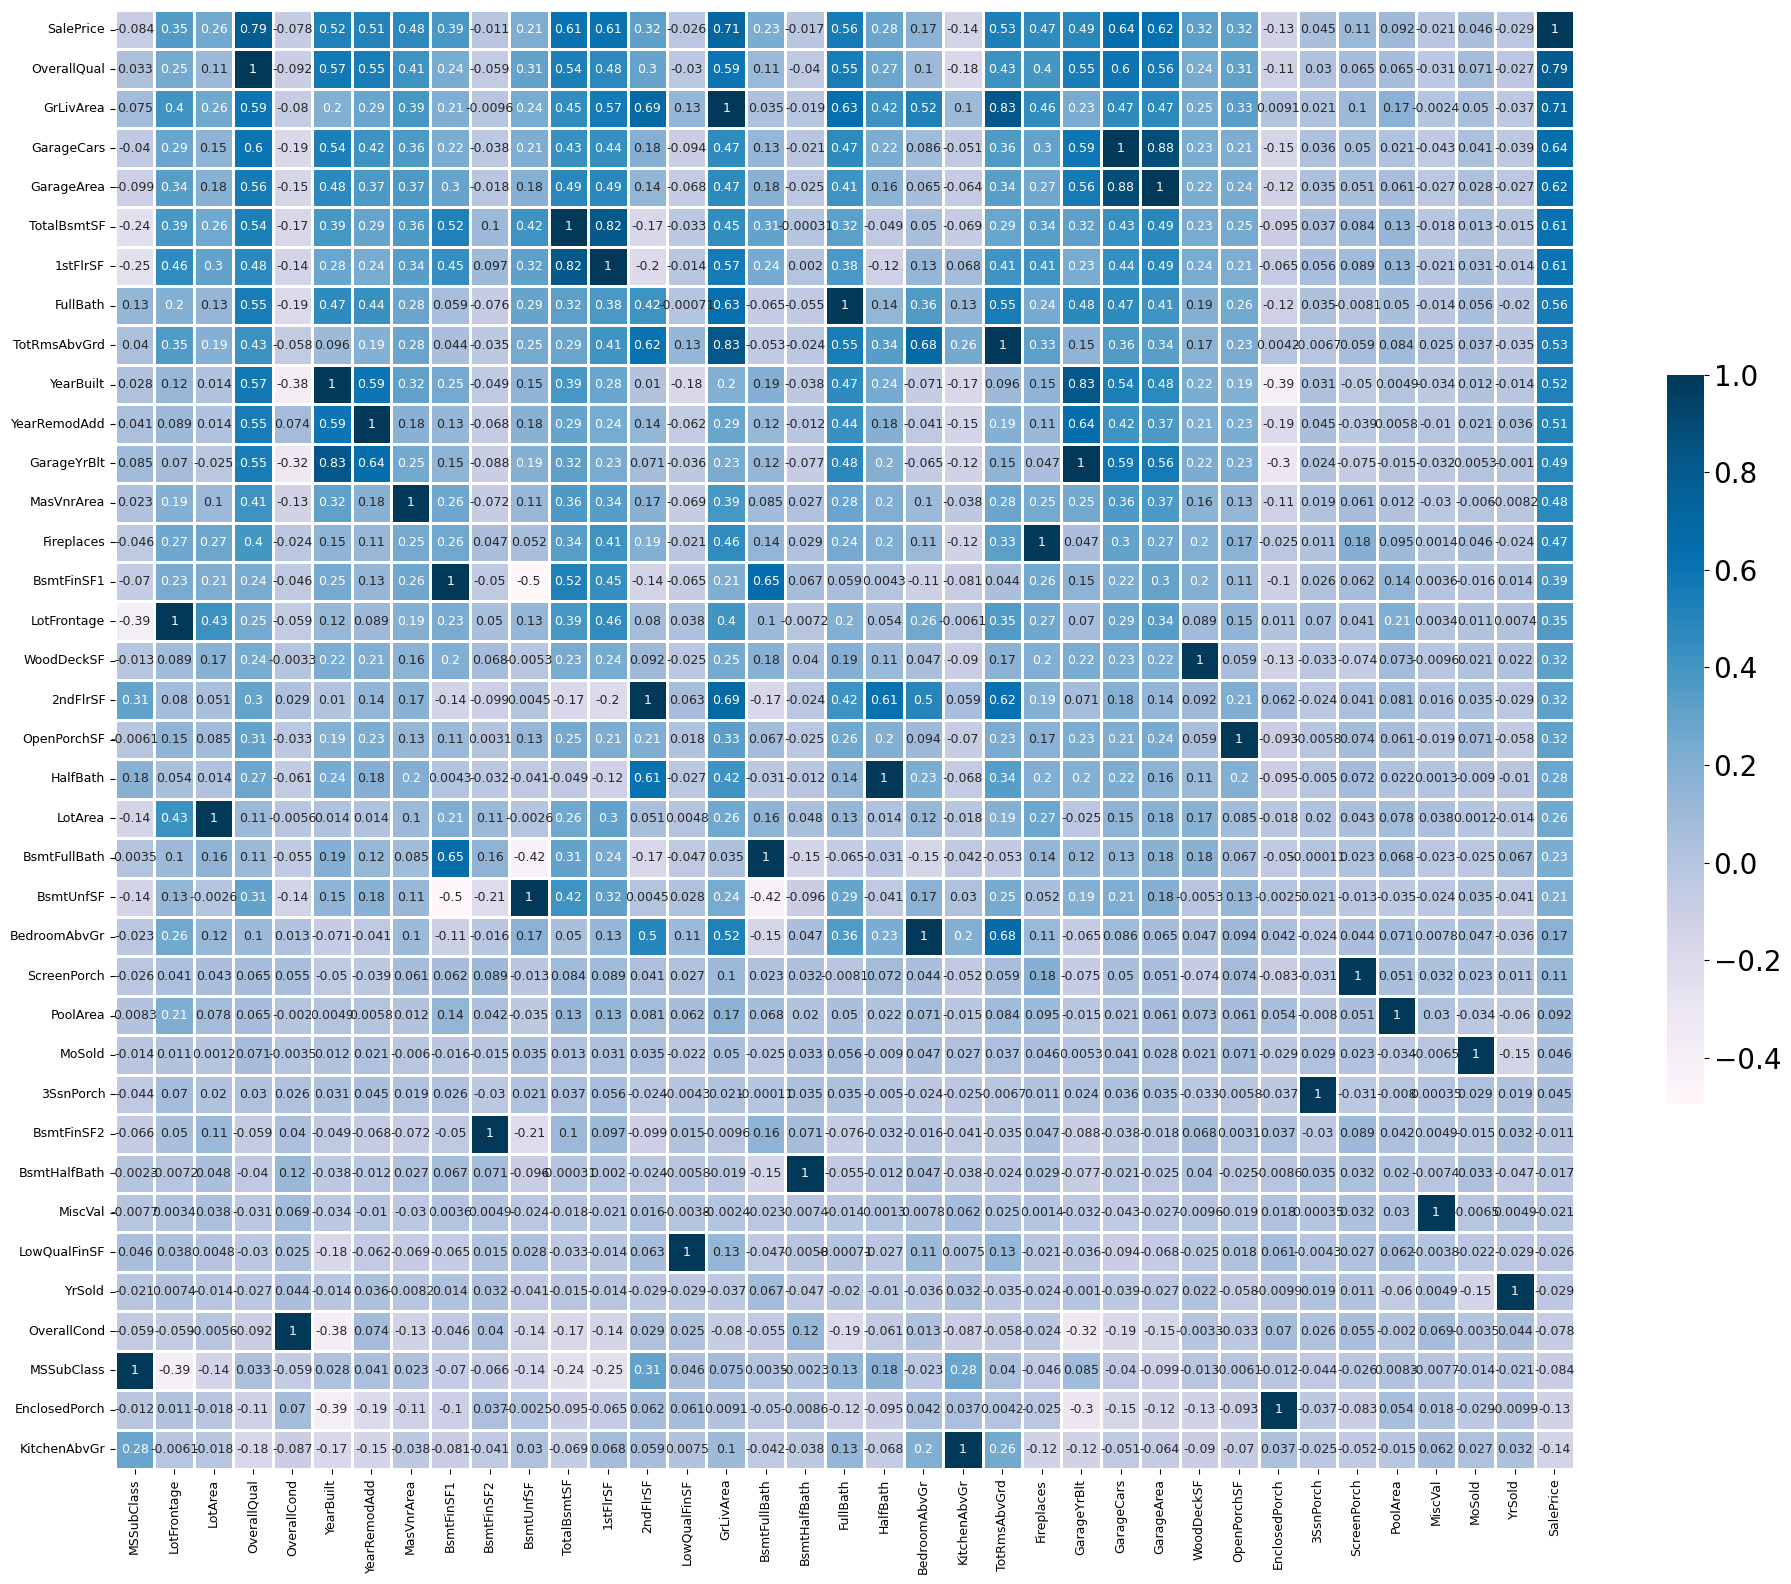

In [ ]:
correlation_matrix = train_numeric.corr()

# Plotting the correlation matrix couples of fitures with correlation > 0.5
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix.sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='PuBu', square=True, linewidths=1, cbar_kws={"shrink": .5}, annot_kws={"size": 9})
plt.xticks(size=9)
plt.yticks(size=9)
plt.tight_layout()
plt.show()

#### Correlation Heatmap Insights: Feature Selection & Multicollinearity in Linear Regression

This heatmap shows **Pearson correlation coefficients** between all numerical features in the dataset, including the target `SalePrice`.

##### 1. Finding Predictive Features
Features with high absolute correlation with `SalePrice` (e.g., > 0.5) are strong candidates for inclusion in a linear regression model, since they are likely to help explain the variance in the target.

Strong positive correlations with `SalePrice` include:
- `OverallQual` (~0.79)
- `GrLivArea` (~0.71)
- `GarageCars` and `GarageArea` (~0.64)
- `TotalBsmtSF`, `1stFlrSF`, `FullBath` (~0.55–0.6)
These features provide meaningful signal to the model.

---

##### 2. Identifying Multicollinearity Between Features (Not Just with Target)

**Multicollinearity** occurs when two or more features are strongly correlated with each other, which can:
- Inflate variance in coefficient estimates
- Reduce model interpretability
- Harm generalization

From the heatmap, we observe several **strong feature-to-feature correlations**:

| Feature Pair               | Correlation | Explanation                        |
|----------------------------|-------------|------------------------------------|
| `GarageCars` vs `GarageArea` | ~0.88      | Almost the same information        |
| `1stFlrSF` vs `TotalBsmtSF` | ~0.82       | Larger first floor often = larger basement |
| `GrLivArea` vs `TotRmsAbvGrd` | ~0.83     | More living area → more rooms      |
| `YearBuilt` vs `GarageYrBlt` | ~0.83     | Newer houses tend to have newer garages |

**Action**: When two features are highly correlated with each other, we may keep only one — especially if both are also correlated with `SalePrice` — to reduce redundancy and stabilize coefficient estimates.

---

##### 3. Low or No Correlation Features

Some features show low or no correlation with most other features or with `SalePrice`, e.g.:
- `MiscVal`, `3SsnPorch`, `BsmtHalfBath` - **Strength the assumption that needed to be dropped.**

These are unlikely to help a linear model and may introduce noise.

➡ Consider removing or transforming them.

---

#### 4. Correlation ≠ Causation & Limitations

- Pearson correlation only measures **linear** relationships.
- Non-linear relationships will be missed, even if they are strong.
- Correlation can be sensitive to outliers.

That’s why this plot is just one tool. We should also examine:
- Scatterplots
- Domain knowledge
- Feature importance from models

---

#### Summary: What to Take from the Heatmap

| What We Learn                        | How It Helps Us                              |
|-------------------------------------|----------------------------------------------|
| Which features strongly relate to `SalePrice` | Use them as predictors in the model         |
| Which features are highly correlated with each other | Remove duplicates, avoid multicollinearity |
| Which features are weak or irrelevant | Drop or transform                            |

This analysis helps build a **robust and interpretable linear regression model**.


### Removing Features Unsuitable for Linear Regression (Using Scaling Only)

In this step, we remove features that are **incompatible with linear regression under a scaling-only preprocessing pipeline**.

Linear regression models assume a linear relationship between features and the target, and rely on scaled, continuous numerical features for meaningful coefficient learning.
Since we are not applying transformations like one-hot encoding, binarization, or log-scaling, we will drop features that are not suitable for scaling.

We remove features that fall into one or more of the following categories:

- **Discrete features with very low cardinality** (e.g., values like 0, 1, 2), which behave like categorical variables and cannot be meaningfully scaled.
- **Sparse features** with a dominant value (often 0) in 95%+ of the dataset, offering little variance and poor predictive signal.
- **Extreme skew or outlier-dominated features** where linear scaling would not be sufficient to stabilize the distribution.

The goal is to retain only features that offer continuous, meaningful, and scale-friendly input for the model.


Based on the percentage histograms and scatter plot, we chose to remove the following features:

| Feature         | Reason for Removal                                      |
|----------------|----------------------------------------------------------|
| `BsmtFullBath` | Low number of unique values (0–3), behaves categorically |
| `BsmtHalfBath` | Discrete values, not suitable for scaling                |
| `HalfBath`     | Same as above                                            |
| `LowQualFinSF` | ~100% zero values, very sparse                           |
| `BsmtFinSF2`   | Over 90% zeros, weak signal                              |
| `3SsnPorch`    | Almost always zero                                       |
| `ScreenPorch`  | Sparse and non-informative                               |
| `PoolArea`     | Nearly all values are zero                               |
| `MiscVal`      | Extreme outliers, mostly zero, non-linear behavior       |

These features either violate assumptions of linear models or would provide little to no predictive benefit after scaling. Removing them simplifies the feature space and helps reduce noise, multicollinearity, and overfitting risk.


In [ ]:
# List of features to drop based on histogram and distribution analysis
features_to_drop = [
    'BsmtFullBath',    # low cardinality (discrete values like 0, 1, 2)
    'BsmtHalfBath',    # same as above
    'HalfBath',        # same as above
    'LowQualFinSF',    # almost all values are zero
    'BsmtFinSF2',      # highly sparse
    '3SsnPorch',       # mostly zeros
    'ScreenPorch',     # sparse, weak signal
    'PoolArea',        # nearly all values are zero
    'MiscVal'          # mostly zeros with extreme outliers
]

# Drop from training and test sets
train = train.drop(columns=features_to_drop)
test = test.drop(columns=features_to_drop)




### Distribution of SalePrice
We examine the shape of the target variable.
Many regression models assume normally distributed residuals (e.g., Linear Regression).
Since SalePrice is clearly right-skewed, we may later apply a log-transform to improve model fit.

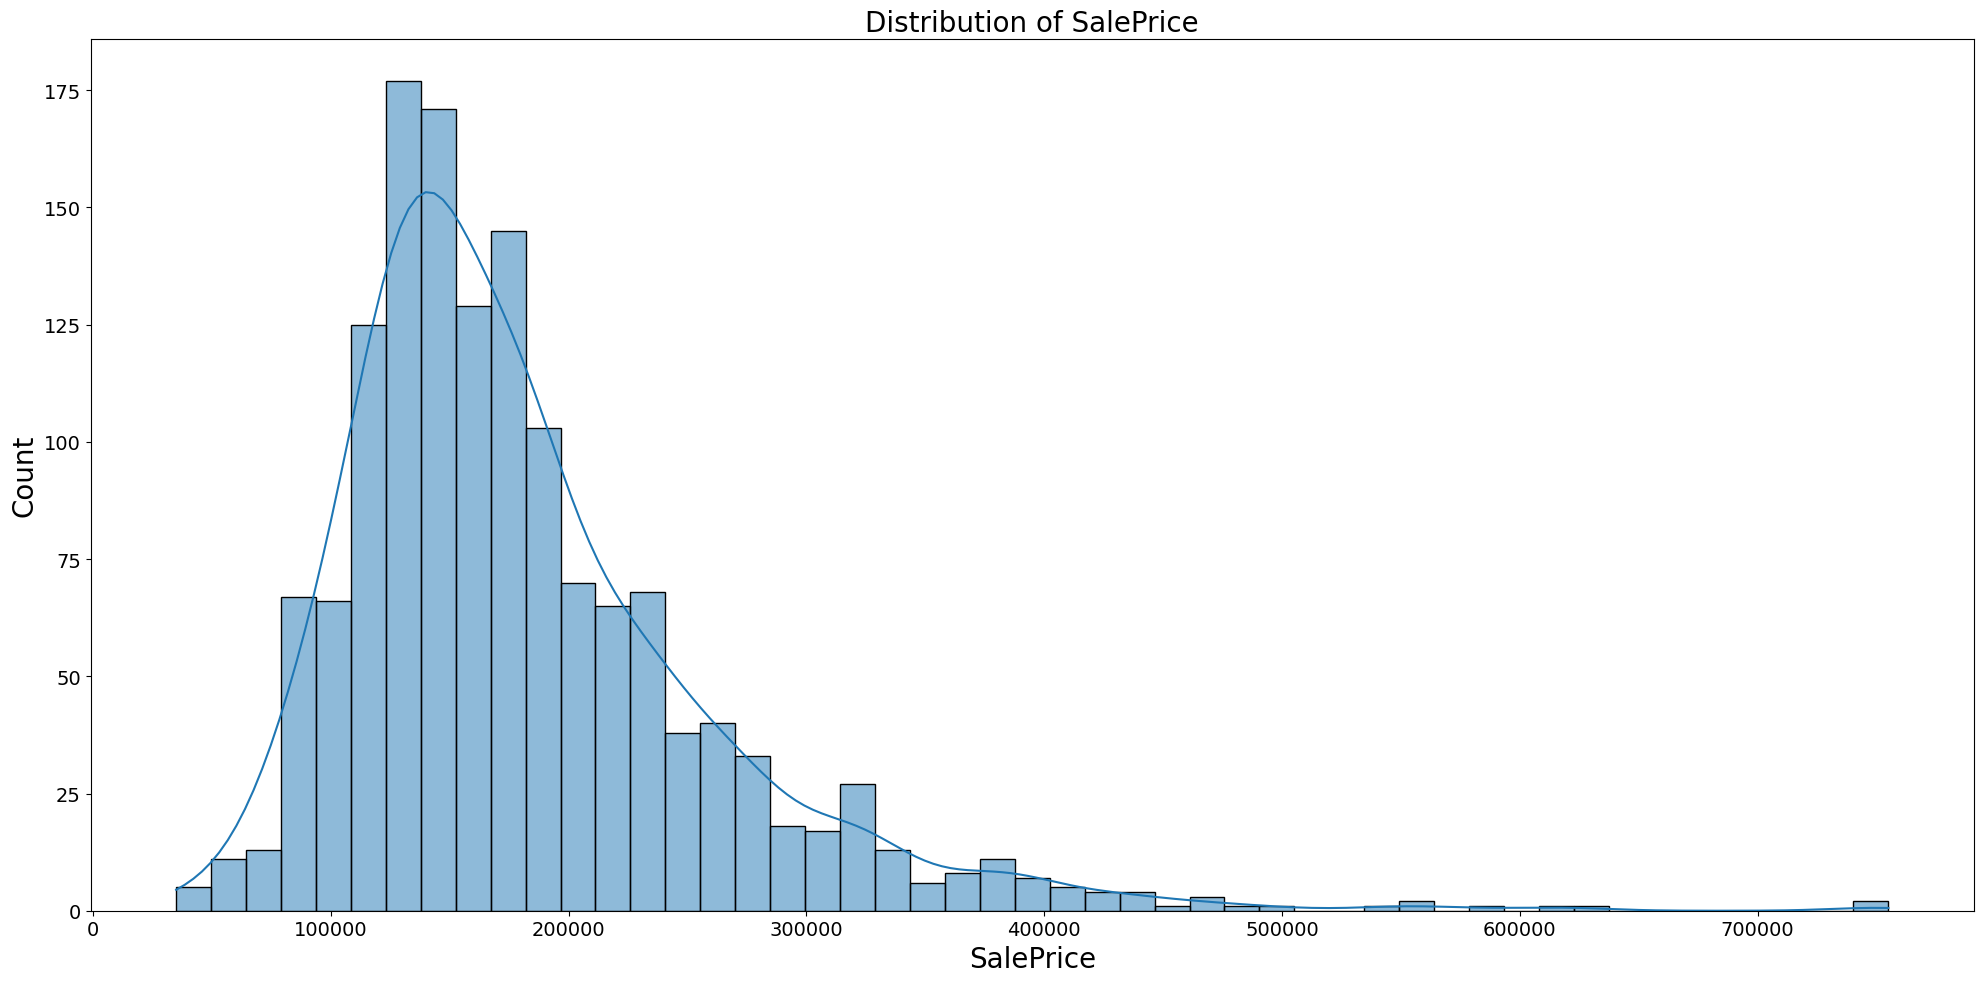

In [ ]:
sns.histplot(train_numeric['SalePrice'], kde=True)
plt.title("Distribution of SalePrice", size=20)
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.xticks(size=14)
plt.yticks(size=14)

plt.tight_layout()
plt.show()


## Linear Rigression

## Train/Test Split (Validation)

Before training our model, we split the original training dataset into two parts:

- **Training set** – used to fit the model
- **Validation set** – used to evaluate model performance on unseen data

This allows us to test how well the model generalizes and compare results before and after scaling.  
We'll use a standard 80/20 split using `train_test_split` from `sklearn.model_selection`.


In [ ]:
# # Split the data into training and validation sets
# from sklearn.model_selection import train_test_split

# # Step 1: Separate full X and y from original train set
# X_full = train_numeric.drop(columns=['SalePrice'])
# y_full = train_numeric['SalePrice']

# # Step 2: Split into train and validation sets (80% / 20%)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_full, y_full, test_size=0.2, random_state=42
# )


# X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X_full, y_full, test_size=0.2, random_state=2)

# # Optional check
# print(f"Training samples: {len(X_train)}")
# print(f"Validation samples: {len(X_val)}")


## Train Test Split

Let's split the data to train and test with Scikit-learn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


In [ ]:
# detach the target values from the input data
t = train_cleaned['SalePrice']
X = train_cleaned.drop('SalePrice', axis=1)
print('X')
display(X)
print()
print('t')
display(t)



X


MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold
0             60     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0          0            0         0        0       2    2008
1             20     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0          0            0         0        0       5    2007
2             60    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0          0            0         0        0       9    2008
3             70     9550            7            5       1915          1970         0.0         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272          0            0         0        0       2    2006
4             60    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0          0            0         0        0      12    2008
5             50    14115            5            5       1993          1995         0.0         732           0         64          796       796       566             0       1362             1             0         1         1             1             1             5           0       1993.0           2         480          40           30              0        320            0         0      700      10    2009
6             20    10084            8            5       2004          2005       186.0        1369           0        317         1686      1694         0             0       1694             1             0         2         0             3             1             7           1       2004.0           2         636         255           57              0          0            0         0        0       8    2007
7             60    10382            7            6       1973          1973       240.0         859          32        216         1107      1107       983             0       2090             1             0         2         1             3             1             7           2       1973.0           2         484         235          204            228          0            0         0      350      11    2009
8             50     6120            7            5       1931          1950         0.0           0           0        952          952      1022       752             0       1774             0             0         2       


t


0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      180000
67      226000
68       8

In [ ]:
#split to train and test using model_selection
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, t, test_size=0.2, random_state=2)
print('X_train')
display(X_train)
print()
print('t_train')
display(t_train)
print()
print('X_test')
display(X_test)
print()
print('t_test')
display(t_test)

X_train


MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold
2             60    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0          0            0         0        0       9    2008
578          160     3604            7            5       2007          2007         0.0           0           0        689          689       703       689             0       1392             0             0         2         0             2             1             5           0       2007.0           2         540           0          102              0          0            0         0        0       2    2008
1375          20    10991            8            5       2007          2007        80.0           0           0       1571         1571      1571         0             0       1571             0             0         2         0             3             1             7           1       2007.0           3         722         100           36              0          0            0         0        0      12    2007
231           60    15138            8            5       1995          1996       506.0         689           0        773         1462      1490      1304             0       2794             1             0         2         1             4             1             9           1       1995.0           3         810           0          146            202          0            0         0        0       7    2009
1204          20    10140            5            6       1975          1975         0.0         788           0        268         1056      1074         0             0       1074             1             0         1         1             3             1             6           0       1975.0           2         495           0           88              0          0            0         0        0       7    2006
83            20     8892            5            5       1960          1960        66.0           0           0       1065         1065      1065         0             0       1065             0             0         1         1             3             1             6           0       1974.0           2         461          74            0              0          0            0         0        0       7    2007
37            20     8532            5            6       1954          1990       650.0        1213           0         84         1297      1297         0             0       1297             0             1         1         0             3             1             5           1       1954.0           2         498           0            0              0          0            0         0        0      10    2009
484           20     7758            5            7       1962          2001         0.0         588           0        411          999       999         0             0        999             1             0         1         0             3             1             6           0       1963.0           1         264           0          132              0          0            0         0        0       3    2007
391           60    12209            6            5       2001          2002         0.0         690           0        114          804       804      1157             0       1961             1             0         2       


t_train


2       223500
578     146000
1375    239000
231     403000
1204    153500
83      126500
37      153000
484     132500
391     215000
445     127500
196     311872
1338    200000
68       80000
847     133500
587     137000
1418    124000
329      78000
186     173000
1220    115000
1005    149900
1189    189000
1135    102000
1198    178000
251     235000
395     129000
337     214000
1029    118000
516     158000
502     140000
745     299800
290     233230
489      86000
1271    185750
537     111250
1437    394617
217     107000
284     179200
547     129500
1019    213490
877     350000
300     157000
323     126175
1400    120000
1252    130000
974     167500
138     230000
259      97000
1033    230000
759     290000
781     175900
1074    194000
511     202665
135     174000
1354    235000
640     274000
498     130000
1251    171750
123     153900
111     180000
703     140000
1207    200000
747     265979
938     239799
486     156000
315     188500
1308    147000
477     38


X_test


MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold
215           20    10011            5            6       1957          1996        64.0         360           0        710         1070      1236         0             0       1236             0             1         1         0             2             1             6           1       1957.0           1         447           0            0              0          0            0         0        0       5    2006
744          120     5395            8            5       1993          1993         0.0         733           0        604         1337      1337         0             0       1337             1             0         2         0             2             1             5           1       1993.0           2         462          96            0             70        168            0         0        0      10    2008
46            50    12822            7            5       2003          2003         0.0        1351           0         83         1434      1518       631             0       2149             1             0         1         1             1             1             6           1       2003.0           2         670         168           43              0          0          198         0        0       8    2009
788           20     6000            4            7       1954          2000         0.0           0           0        901          901       901         0             0        901             0             0         1         0             2             1             4           0       1954.0           1         281           0            0              0          0            0         0        0       8    2008
844           50    12665            5            8       1915          1950         0.0           0           0        876          876       876       540             0       1416             0             0         1         1             4             1             7           1       1949.0           3         720         418            0            194          0            0         0        0       6    2008
1331          80    10780            5            5       1976          1976         0.0         483           0        428          911       954         0             0        954             0             0         1         0             3             1             6           0       1976.0           2         576           0            0              0          0            0         0        0       7    2006
1356          20     9477            5            5       1966          1966        65.0         340           0        524          864       892         0             0        892             0             0         1         0             3             1             5           0       1966.0           1         264           0            0              0          0            0         0        0      10    2008
428           20     6762            7            5       2007          2007       108.0         664           0        544         1208      1208         0             0       1208             1             0         2         0             2             1             6           0       2007.0           2         628         105           54              0          0            0         0        0       9    2007
355           20    11249            6            5       1995          1995         0.0         334         544        322         1200      1200         0             0       1200             1             0         2       


t_test


215     134450
744     180000
46      239686
788     107900
844     153900
1331    132500
1356    110000
428     195400
355     177500
1351    171000
957     132000
1193    165000
1111    205000
195     148500
1048    115000
1237    195000
1228    367294
894     118858
1116    184100
540     315000
927     176000
523     184750
60      158000
157     269500
1405    275000
1404    105000
1221    134000
901     153000
773     114500
579     131500
878     148000
798     485000
1109    280000
881     187500
1428    119000
399     241000
568     316600
465     178740
107     115000
171     215000
1208    140000
1241    248328
1458    142125
282     207500
73      144900
898     611657
301     267000
480     326000
557     108000
17       90000
778     144000
416     149500
369     162000
1057    248000
527     446261
696      89000
373     123000
663     137500
992     187000
525     176000
608     359100
612     261500
657     149000
1269    144000
433     181000
1021    194000
1239    26

## Linear Regression Model Using Normal Equations

In [ ]:
# train linear regression model with NE
NE_model = linear_model.LinearRegression()
NE_reg = NE_model.fit(X_train, t_train)

In [ ]:
# calculate R2 score for each group
print('R2 score on train', NE_reg.score(X_train, t_train))
print('R2 score on test', NE_reg.score(X_test, t_test))

R2 score on train 0.8168388959316492
R2 score on test 0.772785185987468


## MSE and RMSE
To calculate the MSE or RMSE, we can use Scikit-learn [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

In [ ]:
# calculate MSE and RMSE

y_train = NE_reg.predict(X_train)
y_test = NE_reg.predict(X_test)
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))
print()
# RMSE = sqrt(MSE)
print('RMSE on train:', np.sqrt(metrics.mean_squared_error(t_train, y_train)))
print('RMSE on test:', np.sqrt(metrics.mean_squared_error(t_test, y_test)))

MSE on train 1124817072.7014015
MSE on test 1478832407.885233

RMSE on train: 33538.29263247313
RMSE on test: 38455.590073294064


## Linear Regression Using SGD

In [ ]:
# run SGD on the data
sgd_model = linear_model.SGDRegressor(alpha=0, learning_rate='constant')
SGD_reg = sgd_model.fit(X_train, t_train)
y_train = SGD_reg.predict(X_train)
y_test = SGD_reg.predict(X_test)
print('R2 score on train', SGD_reg.score(X_train, t_train))
print('R2 score on test', SGD_reg.score(X_test, t_test))
print()
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))

# RMSE = sqrt(MSE)
print()
print('RMSE on train:', np.sqrt(metrics.mean_squared_error(t_train, y_train)))
print('RMSE on test:', np.sqrt(metrics.mean_squared_error(t_test, y_test)))

R2 score on train -5.2348596082585834e+25
R2 score on test -4.758313016406101e+25

MSE on train 3.2147979728091632e+35
MSE on test 3.0969580597572176e+35

RMSE on train: 5.669918846693631e+17
RMSE on test: 5.5650319493756883e+17


## Features Standardization

We will use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), as mentioned earlier, to standardize the features.
This involves subtracting the mean ($\mu$) of each feature and dividing by its standard deviation ($\sigma$).
This process transforms the data so that it approximates a standard normal distribution: $\mathcal{N} \sim (0, 1)$.

standard score = $\frac{X-\mu}{\sigma}$

In [ ]:
# standardize the features and run SGD on the data

SGD_reg = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDRegressor(alpha=0, learning_rate='constant')).fit(X_train, t_train)
y_train = SGD_reg.predict(X_train)
y_test = SGD_reg.predict(X_test)
print('R2 score on train', SGD_reg.score(X_train, t_train))
print('R2 score on test', SGD_reg.score(X_test, t_test))
print()
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))
# RMSE = sqrt(MSE)
print()
print('RMSE on train:', np.sqrt(metrics.mean_squared_error(t_train, y_train)))
print('RMSE on test:', np.sqrt(metrics.mean_squared_error(t_test, y_test)))

R2 score on train -5071823.032757976
R2 score on test -6021584.915962649

MSE on train 3.114675624391594e+16
MSE on test 3.919161890078039e+16

RMSE on train: 176484436.26539972
RMSE on test: 197968732.12904203


**Now it performs better, close to the performance of NE.**
Let's try to predict only from our best 2 features (LSTAT and RM).

## Linear Regression Using SGD: Top 2 Features Correlated With The Label SalePrice

# Edit

In [ ]:
# run SGD on LSTAT and RM
SGD_reg = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDRegressor(alpha=0, learning_rate='constant')).fit(X_train[['lstat', 'rm']], t_train)
y_train = SGD_reg.predict(X_train[['lstat', 'rm']])
y_test = SGD_reg.predict(X_test[['lstat', 'rm']])
print('R2 score on train', SGD_reg.score(X_train[['lstat', 'rm']], t_train))
print('R2 score on test', SGD_reg.score(X_test[['lstat', 'rm']], t_test))
print()
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))
print()
# RMSE = sqrt(MSE)
print('RMSE on train:', np.sqrt(metrics.mean_squared_error(t_train, y_train)))
print('RMSE on test:', np.sqrt(metrics.mean_squared_error(t_test, y_test)))

KeyError: "None of [Index(['lstat', 'rm'], dtype='object')] are in the [columns]"

We can see that it is not better than using all the features.  
It means that some other features are helping the prediction.  
We will learn more about feature selection in future practices.

## Outliers: Remove medv outliers re-train Linear Regression using Normal Equation

<AxesSubplot: xlabel='medv'>

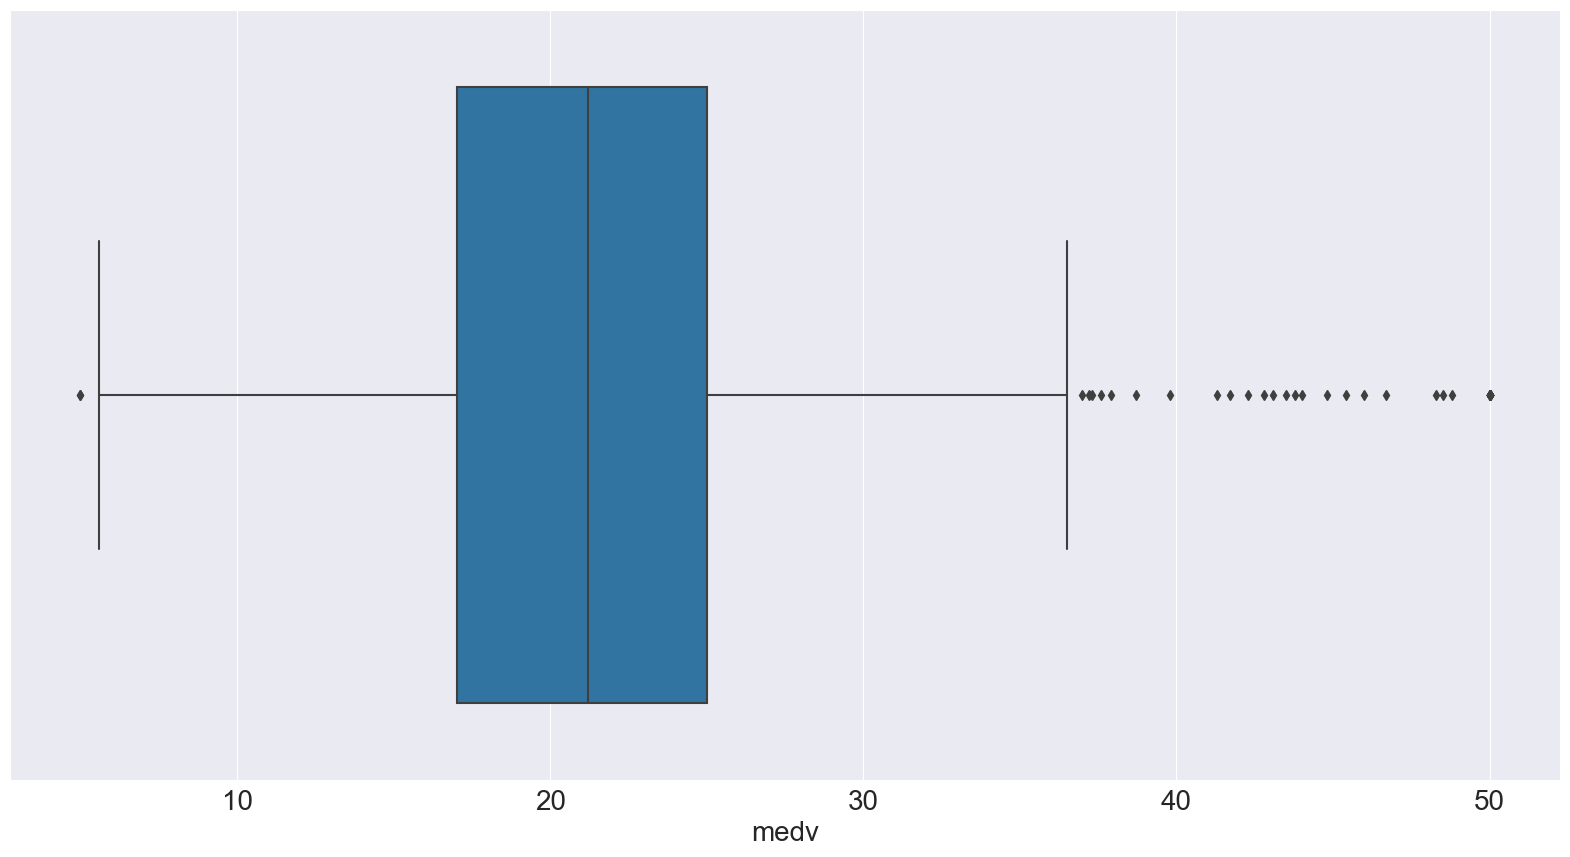

In [ ]:
sns.boxplot(x=train_cleaned['medv'])

In [ ]:
print(f'{train_cleaned["SalePrice"].max() = }')
print(f'{train_cleaned["SalePrice"].min() = }')
train_cleaned["SalePrice"].describe()

train_cleaned["SalePrice"].max() = np.int64(755000)
train_cleaned["SalePrice"].min() = np.int64(35311)


count      1121.000000
mean     185506.152542
std       82999.159004
min       35311.000000
25%      131000.000000
50%      164900.000000
75%      219500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
q1, q3 = np.percentile(train_cleaned["SalePrice"], [25,75])
print(f'{q1 = }, {q3 = }')
iqr = q3 - q1
print(f'iqr = {iqr}')
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(f'Lower bound: {lower_bound}; Upper bound: {upper_bound}')

q1 = np.float64(131000.0), q3 = np.float64(219500.0)
iqr = 88500.0
Lower bound: -1750.0; Upper bound: 352250.0


In [ ]:
# remove data using mask
boston_df_new = train_cleaned[(train_cleaned["SalePrice"]['medv'] >= lower_bound) & (boston_df['medv'] <= upper_bound)]
len(boston_df_new)

466

In [ ]:
boston_df_new['medv'].describe()

count    466.000000
mean      20.719099
std        6.451416
min        5.600000
25%       16.500000
50%       20.600000
75%       24.075000
max       36.500000
Name: medv, dtype: float64

In [ ]:
# detach the target values from the input data
t = boston_df_new['medv']
X = boston_df_new.drop('medv', axis=1)
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, t, test_size=0.2, random_state=2)

In [ ]:
# fit a linear model
NE_reg = linear_model.LinearRegression().fit(X_train, t_train)
# calculate the score for each group
print('R2 score on train', NE_reg.score(X_train, t_train))
print('R2 score on test', NE_reg.score(X_test, t_test))
y_train = NE_reg.predict(X_train)
y_test = NE_reg.predict(X_test)
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))
print()
print('RMSE on train', metrics.mean_squared_error(t_train, y_train, squared=False))
print('RMSE on test', metrics.mean_squared_error(t_test, y_test, squared=False))

R2 score on train 0.7801937262282092
R2 score on test 0.6540117514063286
MSE on train 9.303754305574445
MSE on test 12.678883074657634

RMSE on train 3.0502056169337903
RMSE on test 3.560741927556339


## Check


### Comparing Model Performance Before and After Scaling

To understand the impact of feature scaling, we will train a linear regression model:
1. On the original (unscaled) data
2. On the scaled (standardized) data

Then we will compare the results based on metrics such as Mean Squared Error (MSE) and R² (coefficient of determination).


### 2. Align train and test sets to ensure they have identical columns
* After one-hot encoding, some categories may appear only in train or test. <br>
* We align both datasets to have the same structure (intersection of columns). <br>
* Statistically, inconsistent feature sets will cause model errors or unstable performance. <br>

In [ ]:
train_encoded, test_encoded = train_encoded.align(test_encoded, join='inner', axis=1)
print(f"Shape of training data after encoding: {train_encoded.shape}")


Shape of training data after encoding: (1460, 270)


### 3. Separate features and target
* We remove the target variable before normalization and modeling.
* SalePrice may be log-transformed later to reduce skew.

In [ ]:
X = train_encoded.drop('SalePrice', axis=1)
y = train_encoded['SalePrice']


KeyError: "['SalePrice'] not found in axis"

### 4. Normalize numerical features (Z-score scaling)
* Many models (like linear regression, logistic regression, KNN) assume data is standardized.
* Z-score (standard score) makes features have mean = 0 and std = 1.
* This reduces bias from features with larger numerical scales.


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_encoded)

** Optional: convert back to DataFrame for easier inspection **
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
test_scaled = pd.DataFrame(test_scaled, columns=test_encoded.columns)

## Model Implementation and Hyperparameter Tuning

We implement a Linear Regression model and experiment with different configurations to improve performance. We also explore regularization techniques such as Ridge and Lasso regression. This section includes cross-validation for selecting the best hyperparameters and avoiding overfitting.

## Model Evaluation
We evaluate our trained model using Root Mean Squared Error (RMSE) and analyze the prediction errors. We also present visual comparisons between predicted and actual values to assess how well the model generalizes. This helps us gain insights into the model’s strengths and weaknesses.

## Kaggle Submission

After training and validating our model, we use it to generate predictions for the test set. We then submit these predictions to the Kaggle competition and document the results, including screenshots of the submission and our rank on the leaderboard.

## Summary and Reflections

In this section, we summarize our workflow and key findings. We discuss what worked well and what could be improved. We reflect on our modeling choices and data handling, and how they influenced the results.

Notes:

Linear regression gave reasonable results, but Ridge regularization helped control overfitting.

Feature engineering and handling of missing values had a significant impact.

Visualization of errors provided useful insights into model performance.



## References - ADD LINKS

Kaggle Competition Page

Scikit-Learn Documentation

Pandas Documentation

Kaggle Notebooks by other participants

